# Time Series Analysis on Avocado Price using ARIMA and SARIMA

## Importing Library...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Loading Data...

In [2]:
data = pd.read_csv("/kaggle/input/avocado-prices/avocado.csv")
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
data.shape

(18249, 14)

### The "Unnamed : 0" column is just like an index column. We don't need that in our analysis. So, dropping this columns.

In [4]:
data = data.drop('Unnamed: 0',axis = 1)
data.sample(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9605,2015-10-11,1.66,9860.75,304.48,8500.97,0.00,1055.30,443.33,611.97,0.0,organic,2015,CincinnatiDayton
12289,2016-02-21,1.43,161206.07,14702.41,81578.02,12.13,64913.51,62863.57,2049.94,0.0,organic,2016,California


## EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [6]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


### Converting the date to datetime type, and making it an index for our time series analysis

In [7]:
data_copy = data.copy(deep = True)
data_copy['Date'] = pd.to_datetime(data_copy['Date'])
data_copy.set_index('Date',inplace = True)
data_copy = data_copy.resample('W').sum()
data_copy.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Date,,,,,,,,,,
2015-01-04,140.54,8.467434e+07,33098258.74,36851038.43,2278818.64,12446221.39,9910008.90,2485655.90,50556.59,217620
2015-01-11,148.03,7.855581e+07,31024164.99,32808429.84,2349167.45,12374044.96,10352936.42,1977832.00,43276.54,217620
2015-01-18,150.24,7.838878e+07,31802706.86,31662041.93,2208250.55,12715784.74,10548854.11,2145586.13,21344.50,217620
2015-01-25,150.89,7.646628e+07,32305132.87,28929122.37,2078378.86,13153646.97,10877316.95,2252815.92,23514.10,217620
2015-02-01,134.68,1.194532e+08,50292988.96,50696230.48,3687489.31,14776526.50,11576833.65,3073989.39,125703.46,217620


## Visualizing Correlation

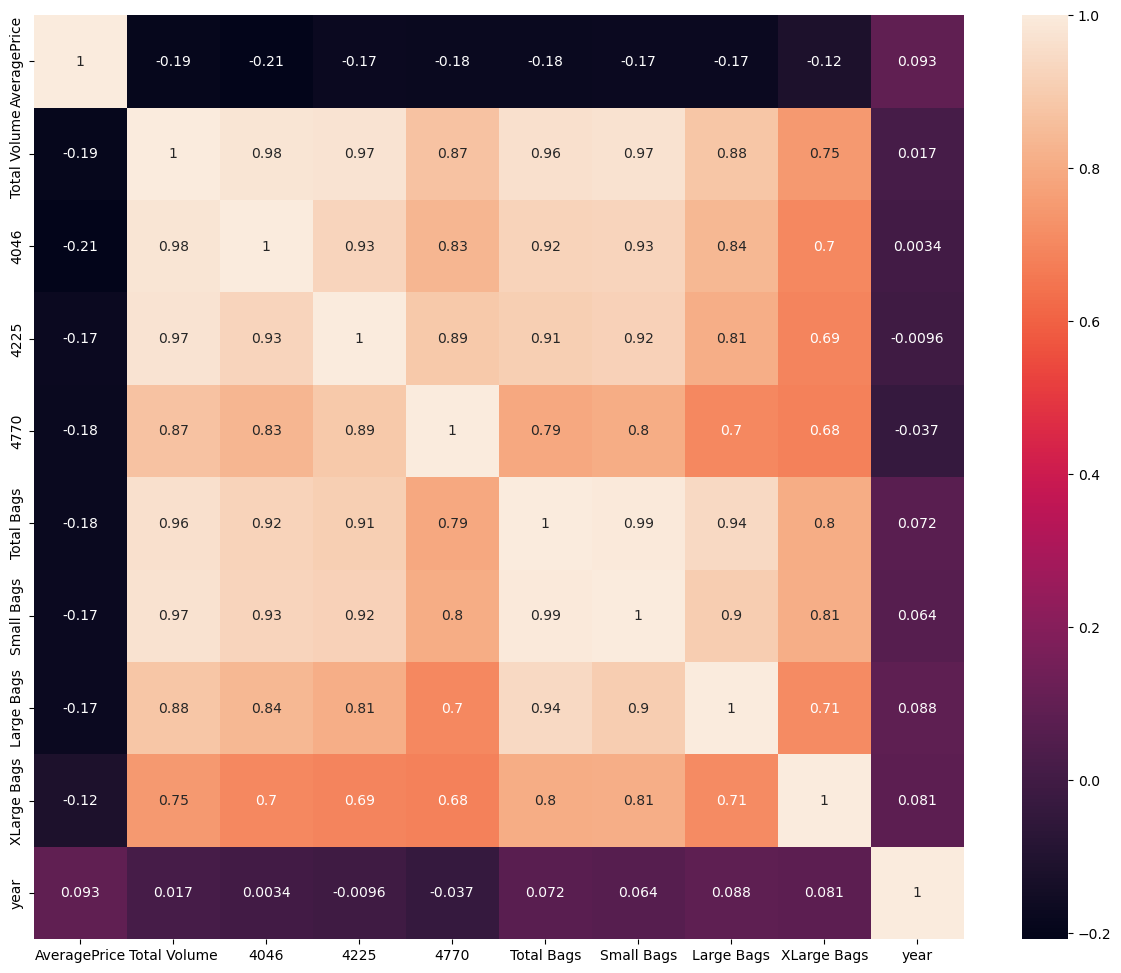

In [8]:
plt.subplots(figsize = (15,12))
sns.heatmap(data.corr(),annot = True)
plt.show()

### Let's visualize the distribution of average price from original data and the same from copied data. For knowing the trend of average price with date, let's visualize this also.

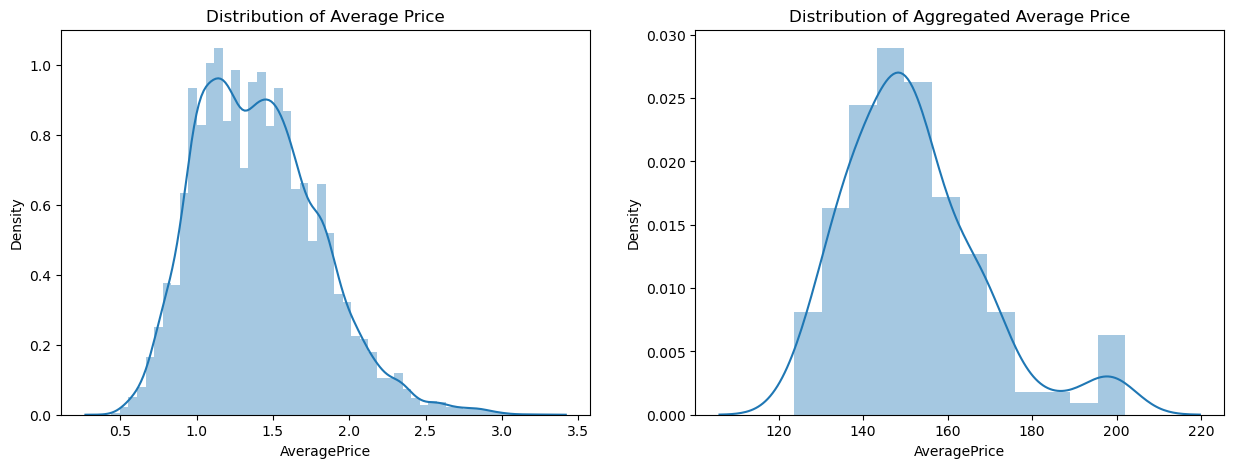

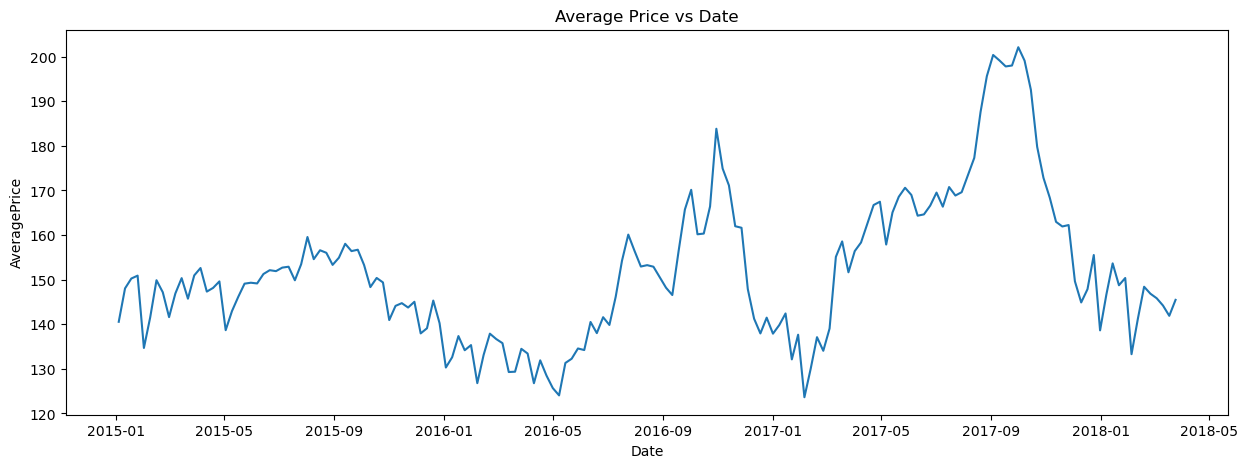

In [9]:
plt.subplots(1,2,figsize = (15,5))

plt.subplot(1,2,1)
sns.distplot(data['AveragePrice'])
plt.title("Distribution of Average Price")

plt.subplot(1,2,2)
sns.distplot(data_copy['AveragePrice'])
plt.title("Distribution of Aggregated Average Price")

plt.subplots(1,1,figsize = (15,5))
plt.subplot(1,1,1)
sns.lineplot(data_copy,x = data_copy.index,y = data_copy['AveragePrice'])
plt.title("Average Price vs Date")

plt.show()

In [10]:
data.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

## Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_data = []
for i in (data.columns.drop('region')):
    if data[i].dtype == 'object':
        data[i] = le.fit_transform(data[i])
        cat_data.append(i)
cat_data.remove('Date')
cat_data.append('year')
data_changed = data.drop(['Date'],axis = 1)        
data_changed.sample(2)        

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
4585,1.30,90368.85,25223.29,26247.81,1185.68,37712.07,32229.69,5482.38,0.0,0,2016,Pittsburgh
14797,1.63,13300.51,332.10,3555.77,0.00,9412.64,5748.61,3664.03,0.0,1,2017,Atlanta


### Distribution and Count of selected categorical data 

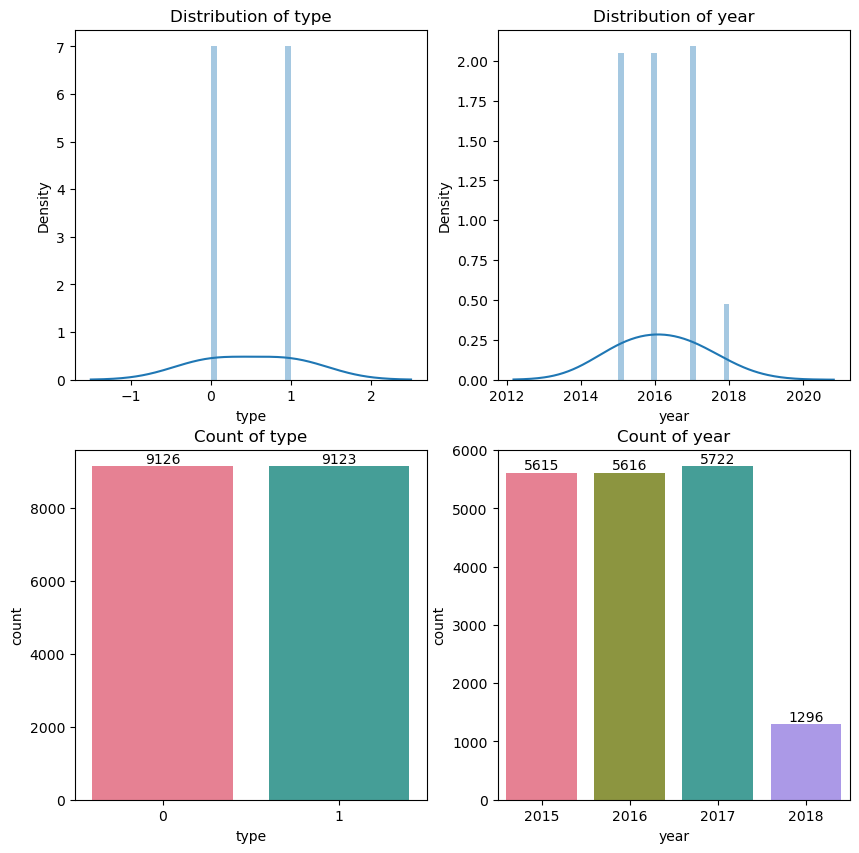

In [12]:
plt.subplots(2,2,figsize=(10,10))
for i in range(len(cat_data)):
    plt.subplot(2,2,i+1)
    sns.distplot(data[cat_data[i]],kde = True,kde_kws={'bw':1})
    plt.title(f"Distribution of {cat_data[i]}")
    
    plt.subplot(2,2,i+3)
    ax2 = sns.countplot(x = data[cat_data[i]],palette = 'husl')
    ax2.bar_label(ax2.containers[0])
    plt.title(f"Count of {cat_data[i]}")
plt.show()            

### Visualizing average price vs type and year

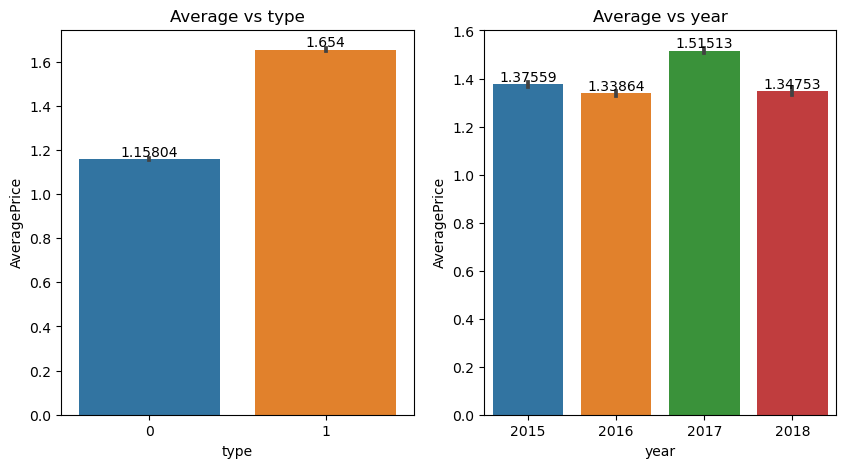

In [13]:
plt.subplots(1,2,figsize = (10,5))
for i in range(len(cat_data)):
    plt.subplot(1,2,i+1)
    ax = sns.barplot(data = data,x = cat_data[i],y ='AveragePrice')
    ax.bar_label(ax.containers[0])
    plt.title(f"Average vs {cat_data[i]}")
plt.show()

In [14]:
num_data = list(set(data.columns) - set(cat_data))
num_data.remove('Date')

In [15]:
num_data.remove('AveragePrice')
num_data.remove('region')
num_data

['4046',
 '4225',
 'XLarge Bags',
 'Large Bags',
 'Total Bags',
 'Total Volume',
 '4770',
 'Small Bags']

### Distribution of selected numerical data 

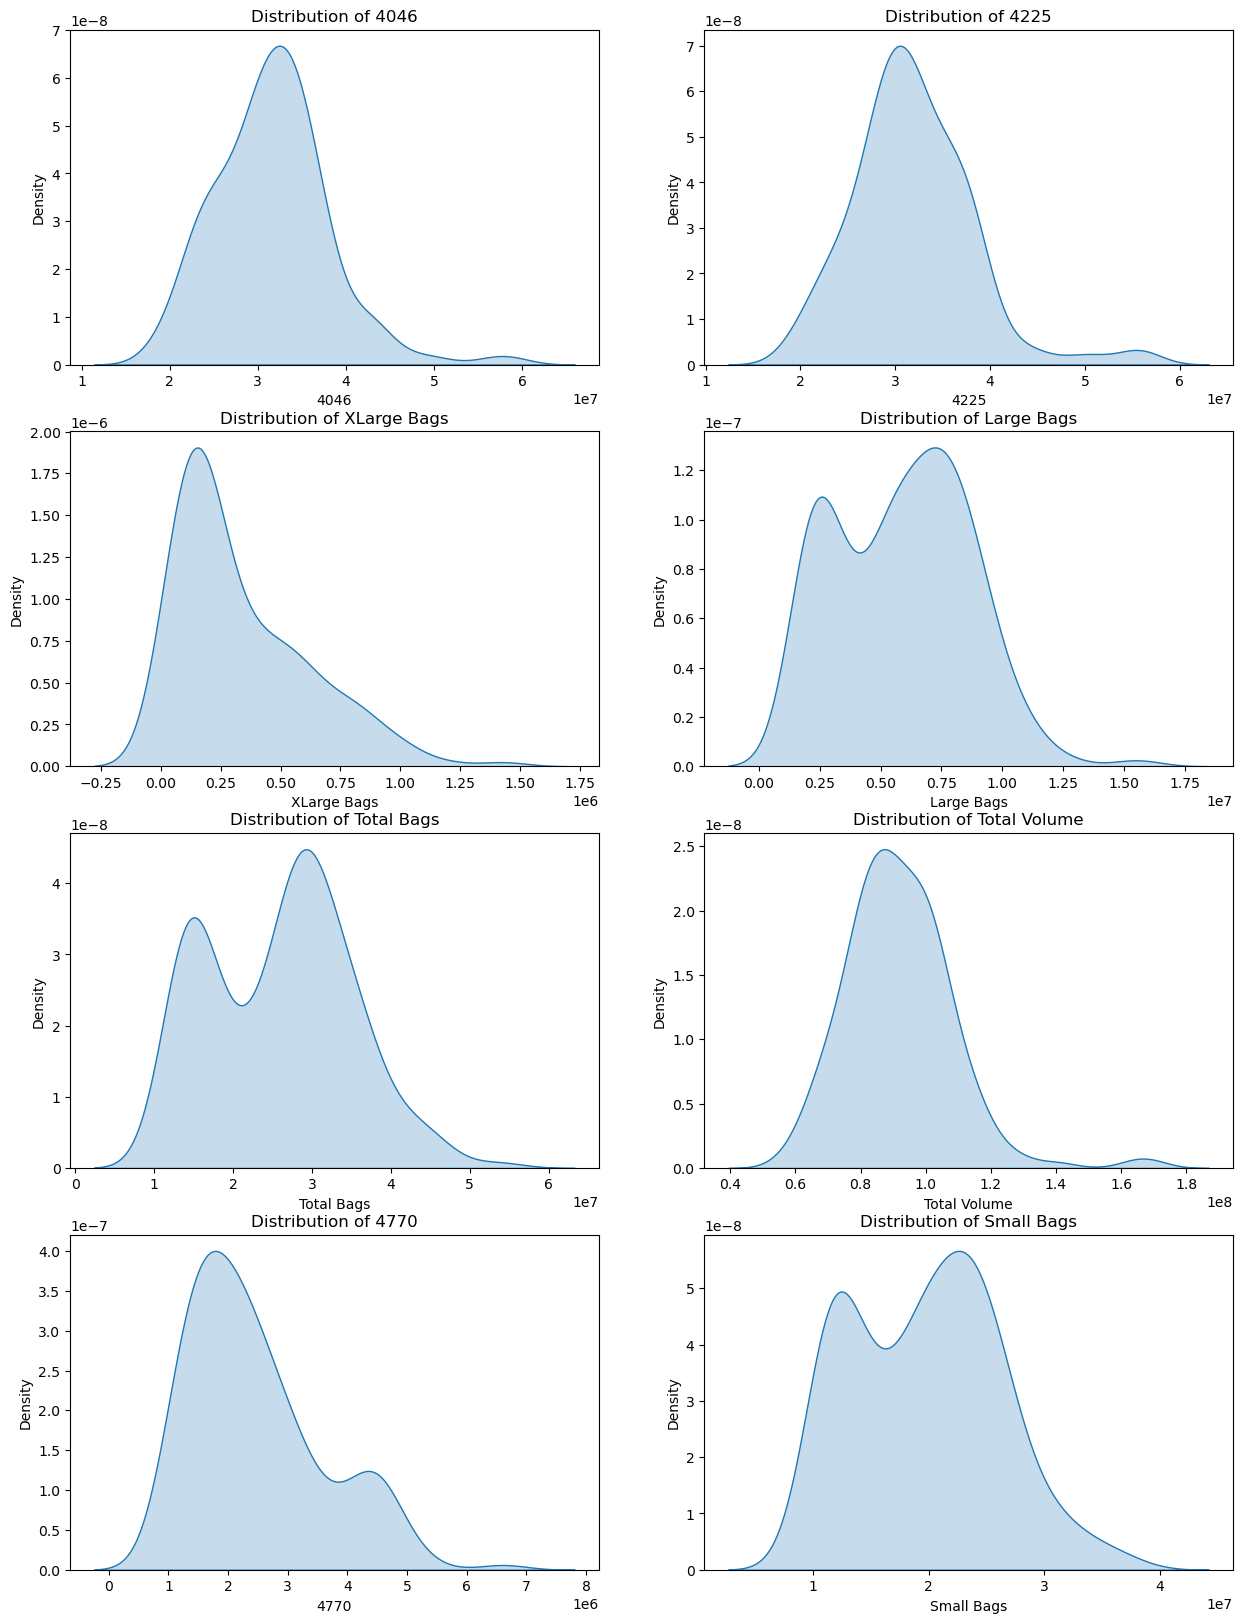

In [16]:
plt.subplots(4,2,figsize = (15,20))
for i in range(len(num_data)):
    plt.subplot(4,2,i+1)
    sns.kdeplot(data_copy[num_data[i]],fill = True)
    plt.title(f"Distribution of {num_data[i]}")
plt.show()        

In [17]:
num_data

['4046',
 '4225',
 'XLarge Bags',
 'Large Bags',
 'Total Bags',
 'Total Volume',
 '4770',
 'Small Bags']

In [18]:
Large_Bagspercent = [(data.groupby('type')['Large Bags'].sum()[0]/data['Large Bags'].sum())*100,
                      (data.groupby('type')['Large Bags'].sum()[1]/data['Large Bags'].sum())*100]

avo_4770_percent = [(data.groupby('type')['4770'].sum()[0]/data['4770'].sum())*100,
                      (data.groupby('type')['4770'].sum()[1]/data['4770'].sum())*100]

Total_Volumepercent = [(data.groupby('type')['Total Volume'].sum()[0]/data['Total Volume'].sum())*100,
                      (data.groupby('type')['Total Volume'].sum()[1]/data['Total Volume'].sum())*100]

Small_Bagspercent = [(data.groupby('type')['Small Bags'].sum()[0]/data['Small Bags'].sum())*100,
                      (data.groupby('type')['Small Bags'].sum()[1]/data['Small Bags'].sum())*100]

XLarge_Bagspercent = [(data.groupby('type')['XLarge Bags'].sum()[0]/data['XLarge Bags'].sum())*100,
                      (data.groupby('type')['XLarge Bags'].sum()[1]/data['XLarge Bags'].sum())*100]

avo_4225_percent = [(data.groupby('type')['4225'].sum()[0]/data['4225'].sum())*100,
                      (data.groupby('type')['4225'].sum()[1]/data['4225'].sum())*100]

Total_Bagspercent = [(data.groupby('type')['Total Bags'].sum()[0]/data['Total Bags'].sum())*100,
                      (data.groupby('type')['Total Bags'].sum()[1]/data['Total Bags'].sum())*100]

avo_4046_percent = [(data.groupby('type')['4046'].sum()[0]/data['4046'].sum())*100,
                      (data.groupby('type')['4046'].sum()[1]/data['4046'].sum())*100]


In [19]:
percent = [Large_Bagspercent,avo_4770_percent,Total_Volumepercent,Small_Bagspercent,XLarge_Bagspercent,
            avo_4225_percent,Total_Bagspercent,avo_4046_percent]

### Visualizing the percentage distribution of selected numerical data over type of avocados

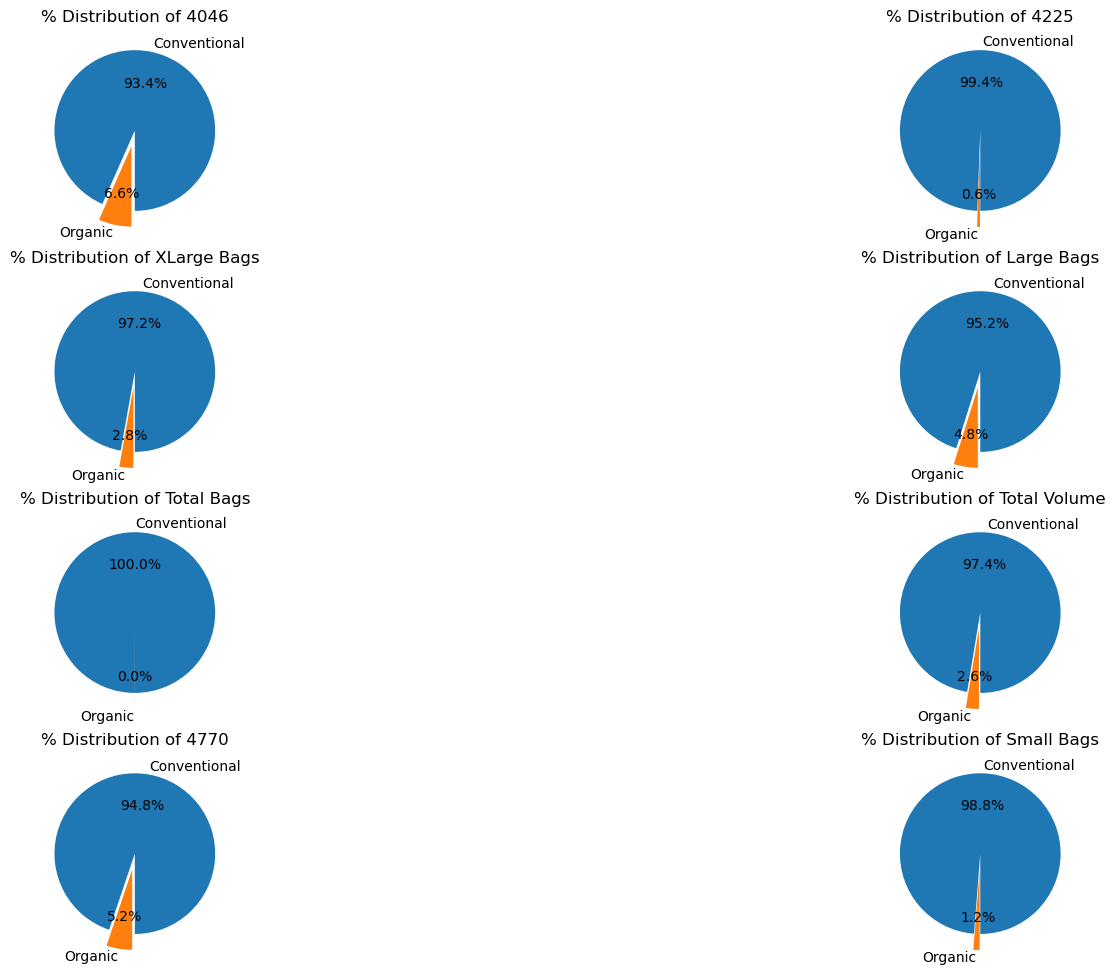

In [20]:
plt.subplots(4,2,figsize = (20,12))
for i in range(len(num_data)):
    plt.subplot(4,2,i+1)
    plt.pie(percent[i],labels = ['Conventional','Organic'],autopct = '%1.1f%%',startangle = 270,explode = (0,0.2))
    plt.title(f'% Distribution of {num_data[i]}')

In [21]:
Large_Bagspercent = [(data.groupby('year')['Large Bags'].sum()[2015]/data['Large Bags'].sum())*100,
                     (data.groupby('year')['Large Bags'].sum()[2016]/data['Large Bags'].sum())*100,
                     (data.groupby('year')['Large Bags'].sum()[2017]/data['Large Bags'].sum())*100,
                     (data.groupby('year')['Large Bags'].sum()[2018]/data['Large Bags'].sum())*100]

avo_4770_percent = [(data.groupby('year')['4770'].sum()[2015]/data['4770'].sum())*100,
                    (data.groupby('year')['4770'].sum()[2016]/data['4770'].sum())*100,
                    (data.groupby('year')['4770'].sum()[2017]/data['4770'].sum())*100,
                    (data.groupby('year')['4770'].sum()[2018]/data['4770'].sum())*100]

Total_Volumepercent = [(data.groupby('year')['Total Volume'].sum()[2015]/data['Total Volume'].sum())*100,
                       (data.groupby('year')['Total Volume'].sum()[2016]/data['Total Volume'].sum())*100,
                       (data.groupby('year')['Total Volume'].sum()[2017]/data['Total Volume'].sum())*100,
                       (data.groupby('year')['Total Volume'].sum()[2018]/data['Total Volume'].sum())*100]

Small_Bagspercent = [(data.groupby('year')['Small Bags'].sum()[2015]/data['Small Bags'].sum())*100,
                     (data.groupby('year')['Small Bags'].sum()[2016]/data['Small Bags'].sum())*100,
                     (data.groupby('year')['Small Bags'].sum()[2017]/data['Small Bags'].sum())*100,
                     (data.groupby('year')['Small Bags'].sum()[2018]/data['Small Bags'].sum())*100]

XLarge_Bagspercent = [(data.groupby('year')['XLarge Bags'].sum()[2015]/data['XLarge Bags'].sum())*100,
                      (data.groupby('year')['XLarge Bags'].sum()[2016]/data['XLarge Bags'].sum())*100,
                      (data.groupby('year')['XLarge Bags'].sum()[2017]/data['XLarge Bags'].sum())*100,
                      (data.groupby('year')['XLarge Bags'].sum()[2018]/data['XLarge Bags'].sum())*100]

avo_4225_percent = [(data.groupby('year')['4225'].sum()[2015]/data['4225'].sum())*100,
                    (data.groupby('year')['4225'].sum()[2016]/data['4225'].sum())*100,
                    (data.groupby('year')['4225'].sum()[2017]/data['4225'].sum())*100,
                    (data.groupby('year')['4225'].sum()[2018]/data['4225'].sum())*100]

Total_Bagspercent = [(data.groupby('year')['Total Bags'].sum()[2015]/data['Total Bags'].sum())*100,
                     (data.groupby('year')['Total Bags'].sum()[2016]/data['Total Bags'].sum())*100,
                     (data.groupby('year')['Total Bags'].sum()[2017]/data['Total Bags'].sum())*100,
                     (data.groupby('year')['Total Bags'].sum()[2018]/data['Total Bags'].sum())*100]

avo_4046_percent = [(data.groupby('year')['4046'].sum()[2015]/data['4046'].sum())*100,
                    (data.groupby('year')['4046'].sum()[2016]/data['4046'].sum())*100,
                    (data.groupby('year')['4046'].sum()[2017]/data['4046'].sum())*100,
                    (data.groupby('year')['4046'].sum()[2018]/data['4046'].sum())*100]


In [22]:
percent_year = [Large_Bagspercent,avo_4770_percent,Total_Volumepercent,Small_Bagspercent,XLarge_Bagspercent,
            avo_4225_percent,Total_Bagspercent,avo_4046_percent]

### Visualizing the percentage distribution of selected numerical data over year

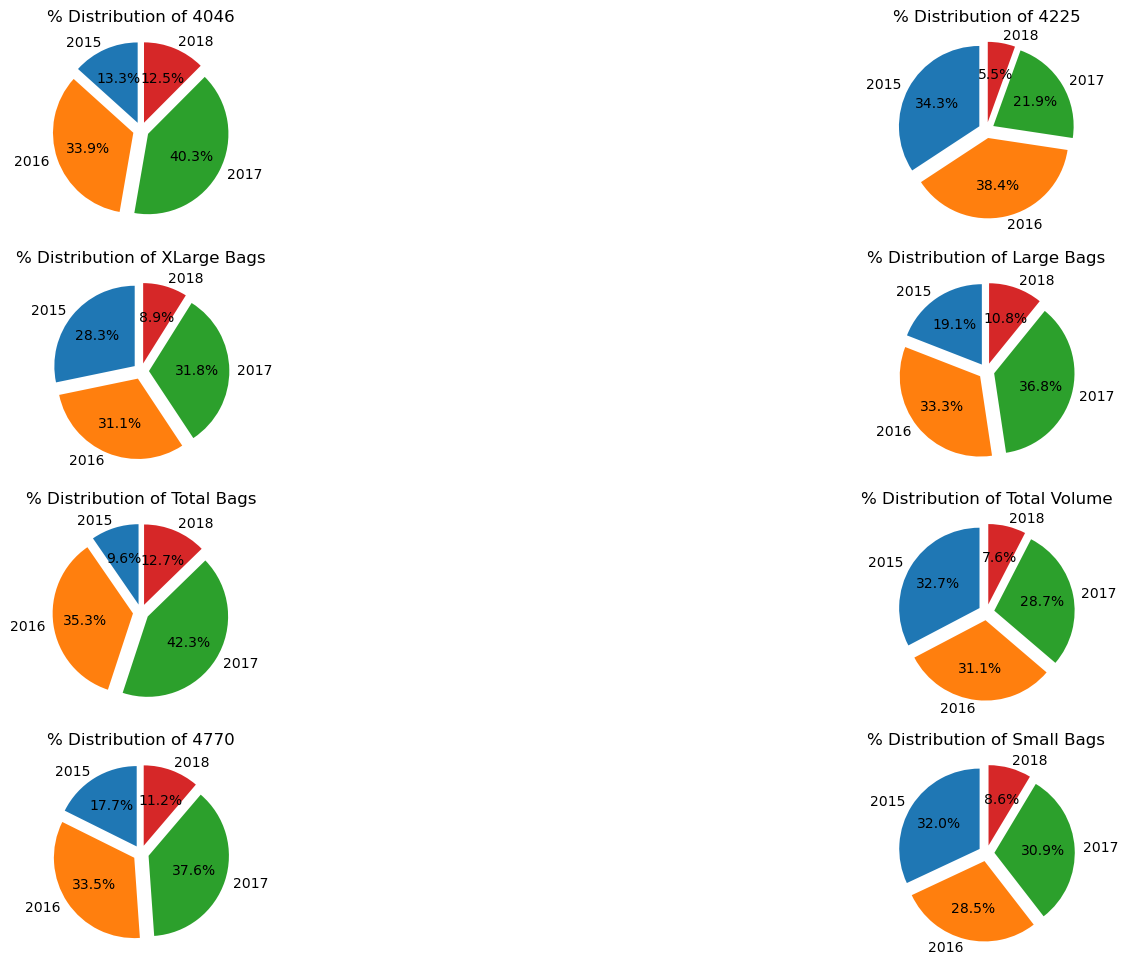

In [23]:
plt.subplots(4,2,figsize = (20,12))
for i in range(len(num_data)):
    plt.subplot(4,2,i+1)
    plt.pie(percent_year[i],labels = [2015,2016,2017,2018],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0.1,0.1,0.1))
    plt.title(f'% Distribution of {num_data[i]}')
    

### Let's visualize the trend of Average price of avocados, total volume, and total bags over date

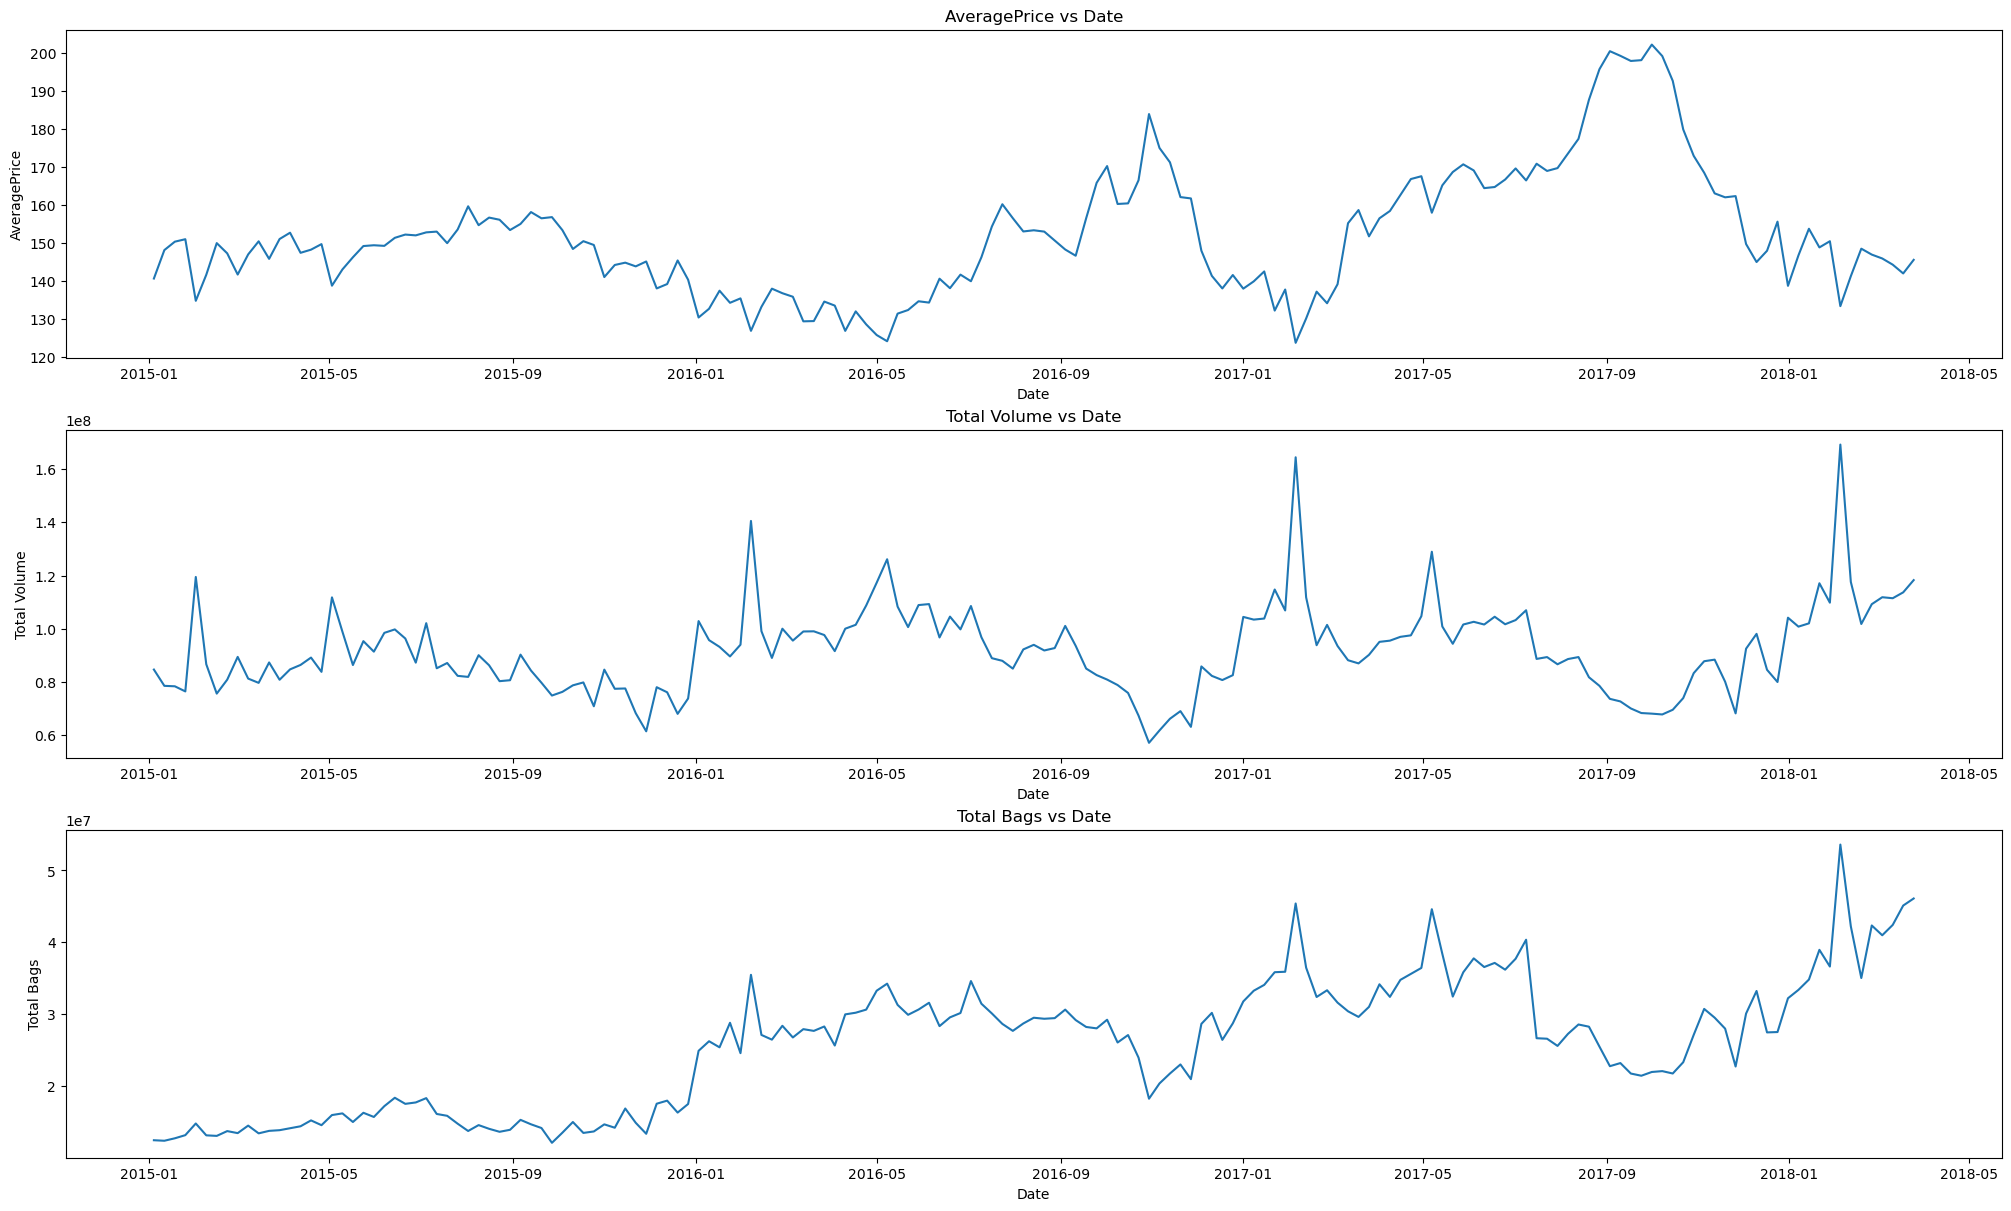

In [24]:
main_features = ['AveragePrice','Total Volume','Total Bags']
plt.subplots(3,1,figsize = (20,12),constrained_layout = True)
for i in range(len(main_features)):
    plt.subplot(3,1,i+1)
    sns.lineplot(data_copy,x = 'Date',y = main_features[i])
    plt.title(f"{main_features[i]} vs Date")

### Let's visualize the avocaodo PLU 4046, 4225, and 4770, types of avocado bags over date

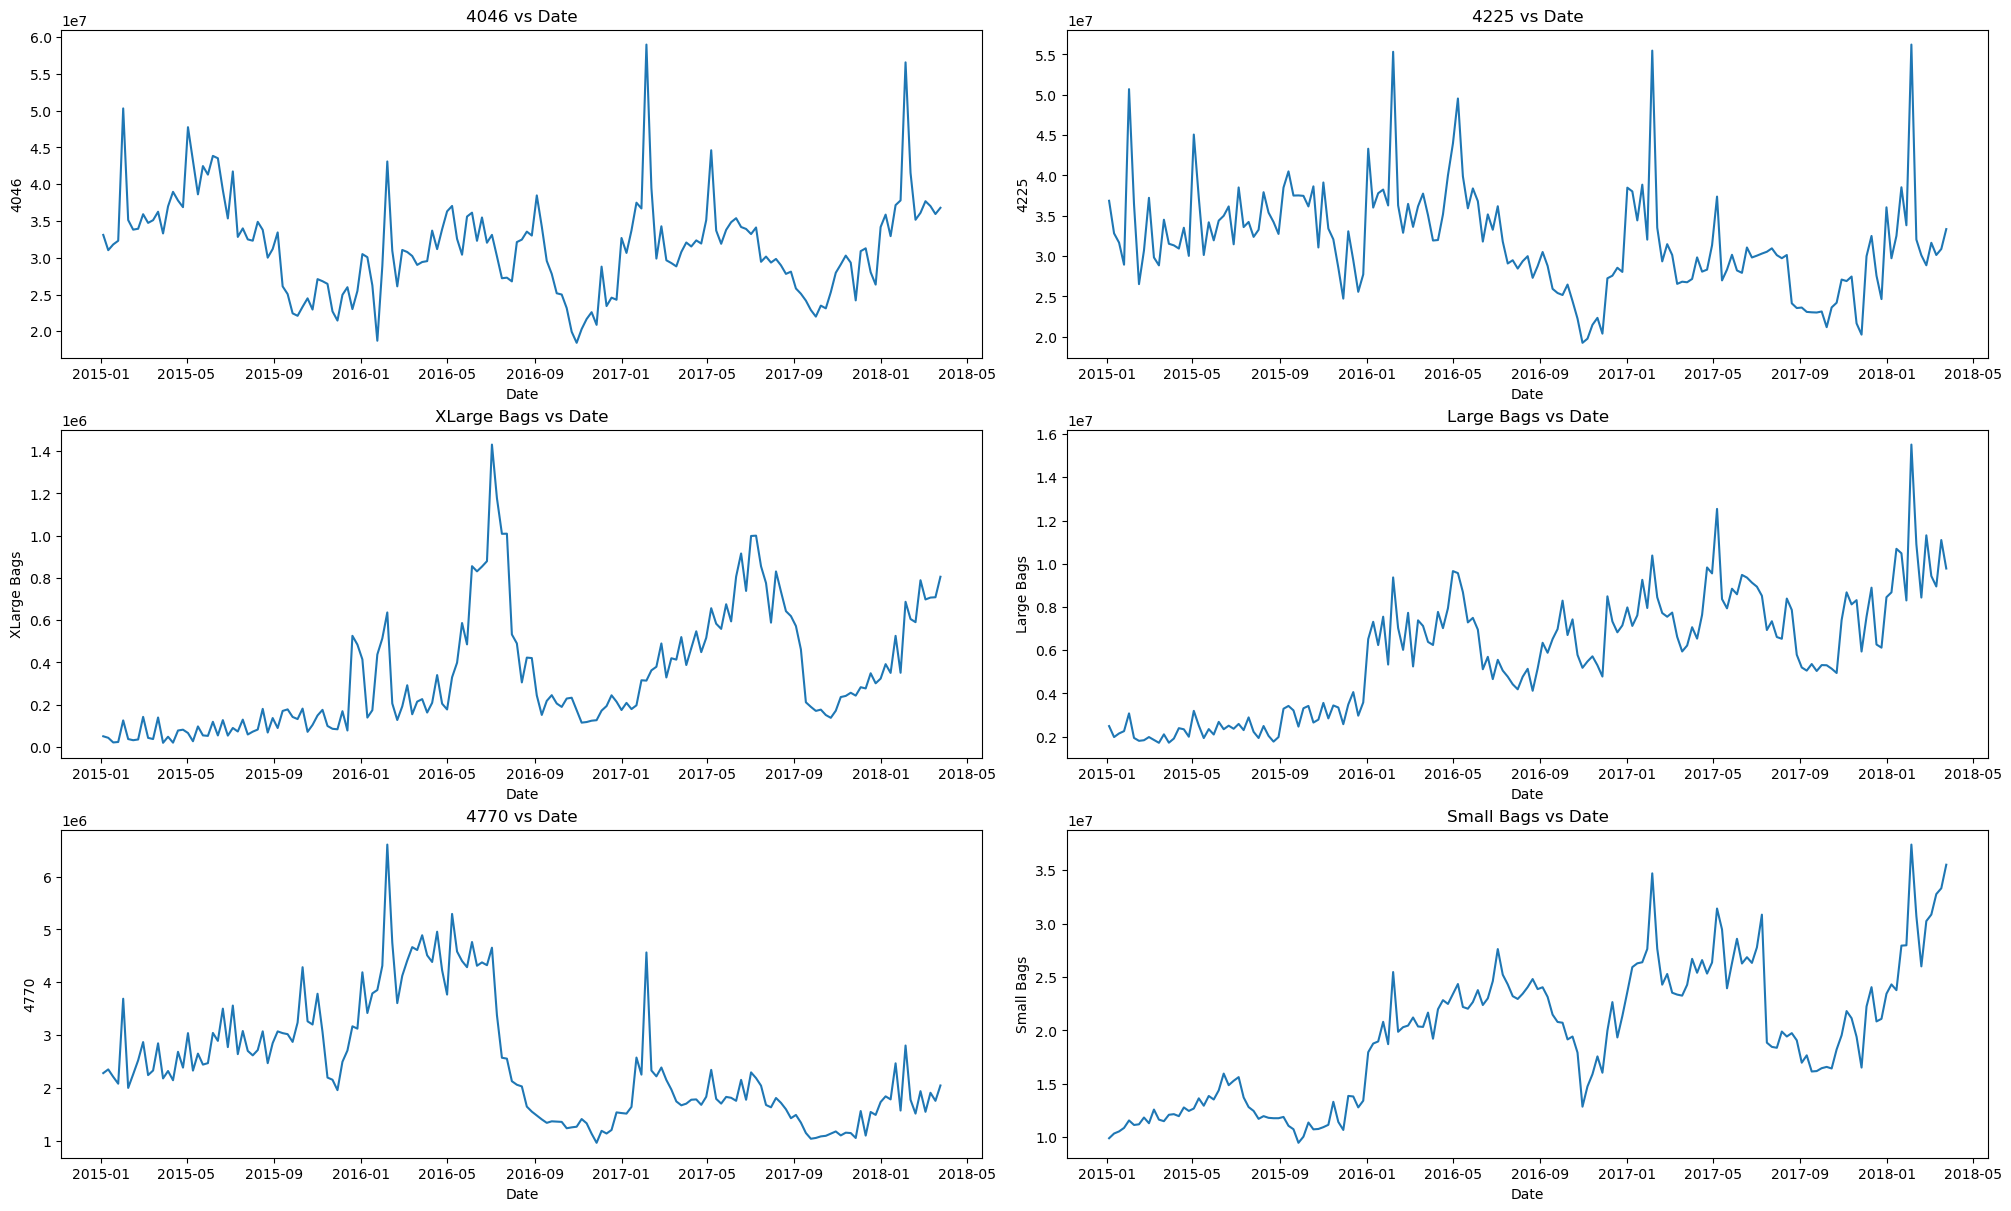

In [25]:
rest_features = list(set(list(data.columns.drop(['Date','region']))) - set(main_features) - set(cat_data))
plt.subplots(3,2,figsize = (20,12),constrained_layout = True)
for i in range(len(rest_features)):
    plt.subplot(3,2,i+1)
    sns.lineplot(data_copy,x = 'Date',y = rest_features[i])
    plt.title(f"{rest_features[i]} vs Date")

### Visualizing total bags and total volumes spread in different regions over type and year

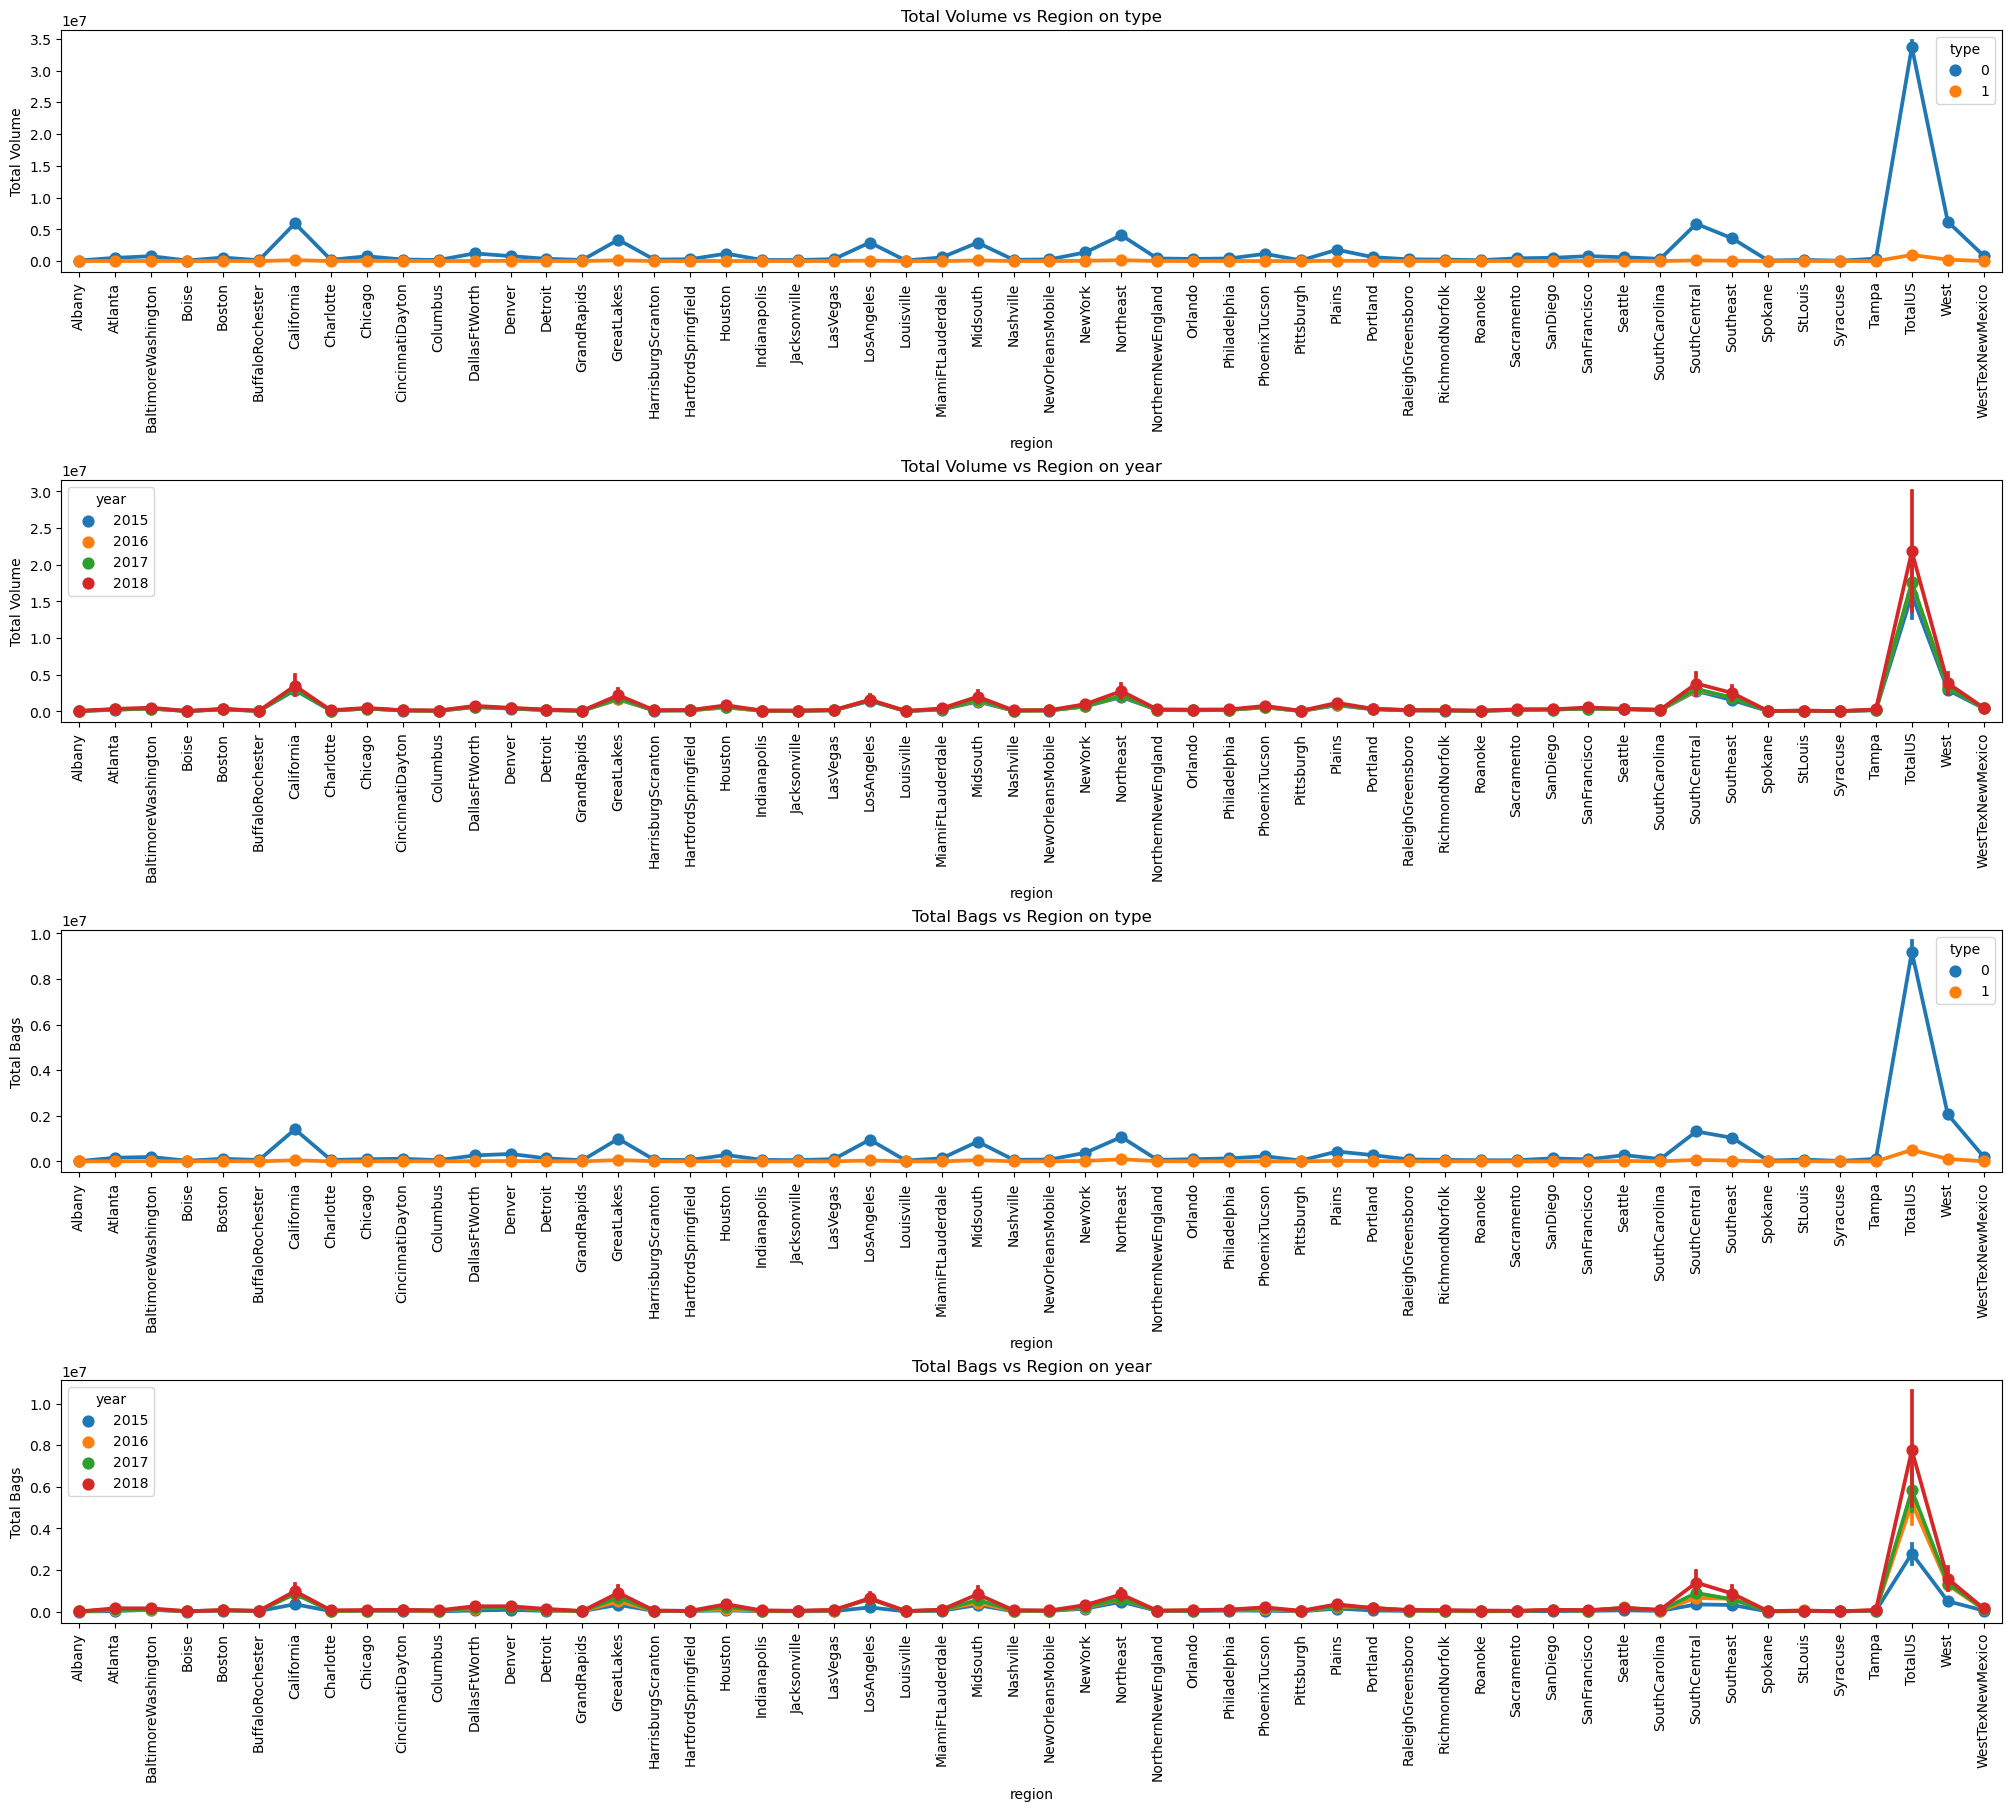

In [26]:
plt.subplots(4,1,figsize = (20,18),constrained_layout = True)
plt.subplot(4,1,1)
sns.pointplot(data, y = 'Total Volume',x = 'region',hue = 'type',palette = 'tab10')
plt.xticks(rotation = 90)
plt.title("Total Volume vs Region on type")
plt.subplot(4,1,2)
sns.pointplot(data,y = 'Total Volume',x = 'region',hue = 'year',palette = 'tab10')
plt.xticks(rotation = 90)
plt.title("Total Volume vs Region on year")
plt.subplot(4,1,3)
sns.pointplot(data,y = 'Total Bags',x = 'region',hue = 'type',palette = 'tab10')
plt.xticks(rotation = 90)
plt.title("Total Bags vs Region on type")
plt.subplot(4,1,4)
sns.pointplot(data,y = 'Total Bags',x = 'region',hue = 'year',palette = 'tab10')
plt.xticks(rotation = 90)
plt.title("Total Bags vs Region on year")
plt.show()


In [27]:
timed = data_copy[['AveragePrice']]
timed.head(3)

,AveragePrice
Date,
2015-01-04,140.54
2015-01-11,148.03
2015-01-18,150.24


In [28]:
from statsmodels.tsa.stattools import adfuller

## Stationarity test helper function

In [29]:
def stationarity_test(timeseries):
    Mean_roll = timeseries.rolling(window = 12).mean()
    Std_roll = timeseries.rolling(window = 12).std()
    
    plt.subplots(figsize = (15,5))
    plt.plot(timeseries,color = 'red')
    plt.plot(Mean_roll,color = 'blue')
    plt.plot(Std_roll, color = 'green')
    plt.legend(labels = ['Original','Rolling Mean','Rolling Std'],loc = 'upper left')
    plt.show()
    
    test = adfuller(timeseries,autolag = 'AIC')
    test_output = pd.Series(test[0:4],index = ['Test Statistic','p-value','#Lags Used','No. of Observations'])
    for key,values in test[4].items():
        test_output['Critical Value (%s)'%key] = values
    
    print(f'Dicker-Fuller test result : \n\n{test_output}')    

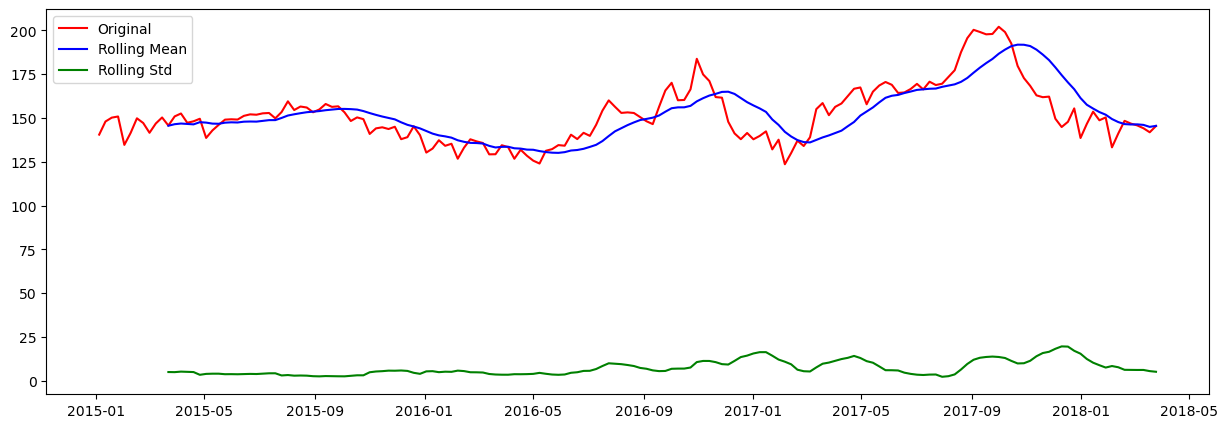

Dicker-Fuller test result : 

Test Statistic           -2.363645
p-value                   0.152261
#Lags Used                0.000000
No. of Observations     168.000000
Critical Value (1%)      -3.469886
Critical Value (5%)      -2.878903
Critical Value (10%)     -2.576027
dtype: float64


In [30]:
stationarity_test(timed['AveragePrice'])

## ARIMA

In [31]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA as ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt

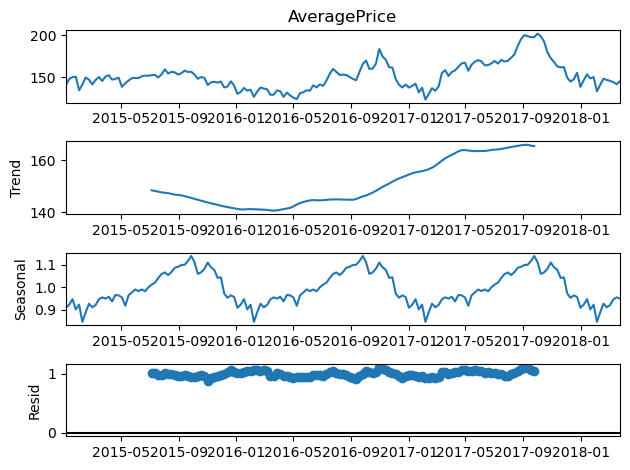

In [32]:
sm.tsa.seasonal_decompose(timed['AveragePrice'],model = 'multiplicative').plot()
plt.show()

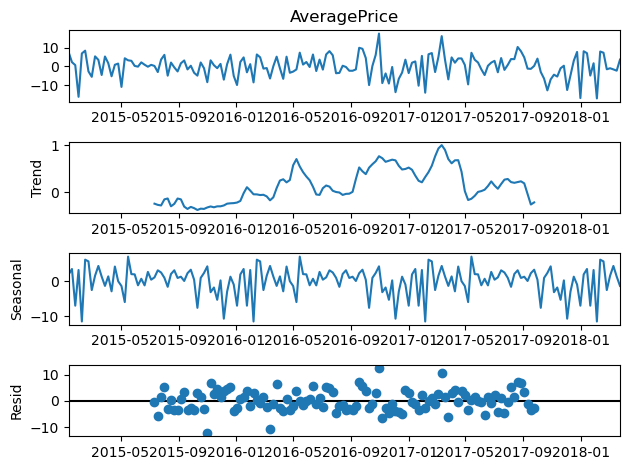

In [33]:
timed['LogAveragePrice'] = np.log(timed['AveragePrice'])
log_diff = timed['AveragePrice'].diff()
log_diff = log_diff.dropna()
sm.tsa.seasonal_decompose(log_diff).plot()
plt.show()

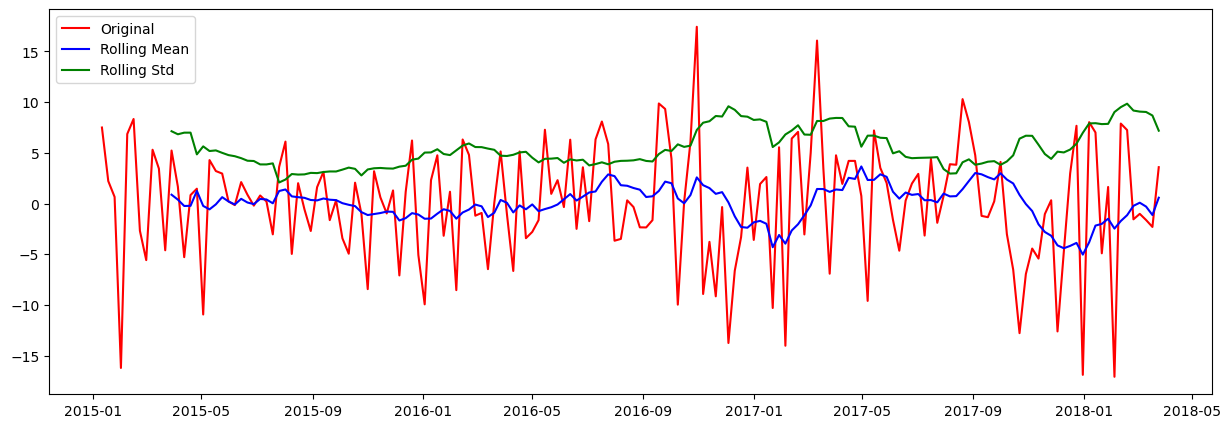

Dicker-Fuller test result : 

Test Statistic         -1.319906e+01
p-value                 1.103965e-24
#Lags Used              0.000000e+00
No. of Observations     1.670000e+02
Critical Value (1%)    -3.470126e+00
Critical Value (5%)    -2.879008e+00
Critical Value (10%)   -2.576083e+00
dtype: float64


In [34]:
stationarity_test(log_diff)

## Time Series Plot Helper function

In [35]:
def timeSeries_plot(x, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(x, pd.Series):
        x = pd.Series(x)
        
    with plt.style.context(style):    
        plt.subplots(figsize = figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        x.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(x)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(x, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(x, lags=lags, ax=pacf_ax)
        plt.tight_layout()

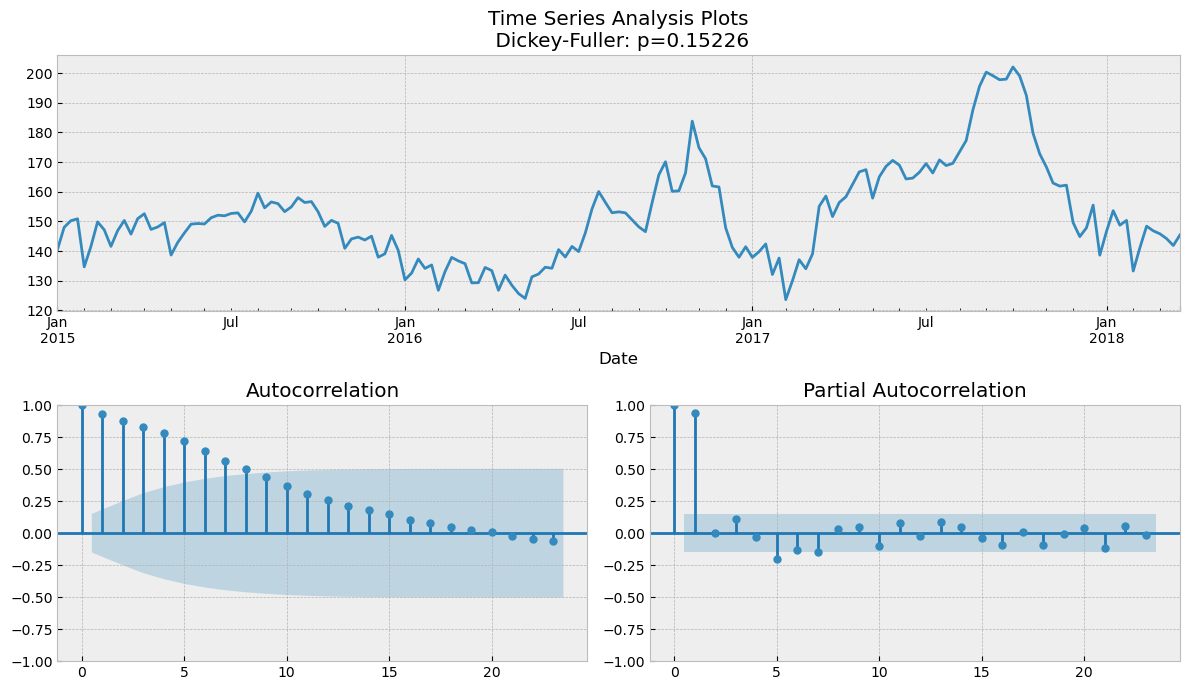

In [36]:
timeSeries_plot(timed['AveragePrice'])

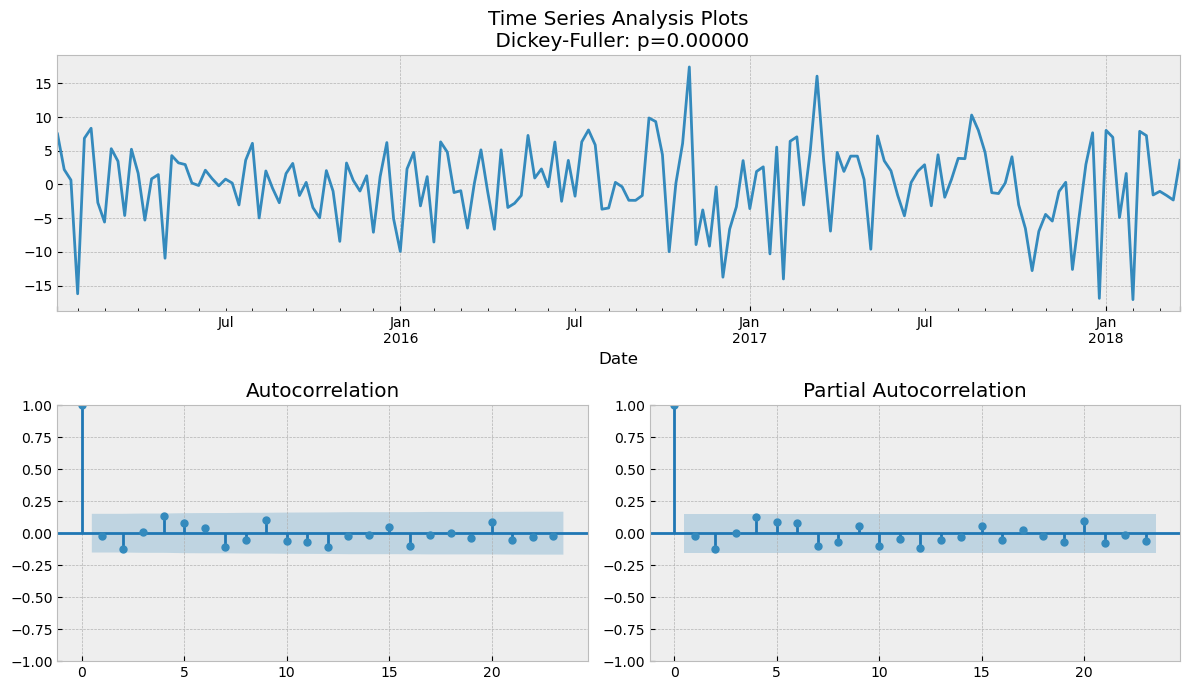

In [37]:
timeSeries_plot(log_diff)

### After visualizing the acf and pacf plot of both Average price and log average price, it comes to a conclusion that (p,d,q) will be (1,1,2)

In [38]:
model = ARIMA(timed['AveragePrice'],order = (1,1,2))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:           AveragePrice   No. Observations:                  169
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -533.154
Date:                Sun, 09 Apr 2023   AIC                           1074.308
Time:                        08:11:29   BIC                           1086.804
Sample:                    01-04-2015   HQIC                          1079.380
                         - 03-25-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0773      0.861     -0.090      0.928      -1.765       1.610
ma.L1          0.0529      0.855      0.062      0.951      -1.623       1.729
ma.L2         -0.0982      0.083     -1.186      0.2

## In - Sample Forecasting

In [39]:
size = int(len(timed) - 30)
train, test = timed['AveragePrice'][0:size], timed['AveragePrice'][size:len(timed)]

print('\t ARIMA MODEL : In - Sample Forecasting \n')

history = [x for x in train]
predictions = []

for t in range(len(test)):
    
    model = ARIMA(history, order=(1,1,2))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(float(yhat))
    
    obs = test[t]
    history.append(obs)
    
    print('predicted = %f, expected = %f' % (yhat, obs))


	 ARIMA MODEL : In - Sample Forecasting 

predicted = 193.947891, expected = 200.360000
predicted = 199.235501, expected = 199.140000
predicted = 198.436364, expected = 197.790000
predicted = 197.778454, expected = 198.000000
predicted = 198.063402, expected = 202.100000
predicted = 201.991895, expected = 199.080000
predicted = 198.710629, expected = 192.550000
predicted = 192.983941, expected = 179.770000
predicted = 180.460441, expected = 172.820000
predicted = 173.991808, expected = 168.380000
predicted = 168.919999, expected = 162.950000
predicted = 163.151366, expected = 161.910000
predicted = 162.314318, expected = 162.230000
predicted = 162.341431, expected = 149.620000
predicted = 149.106758, expected = 144.880000
predicted = 145.556756, expected = 147.850000
predicted = 148.286146, expected = 155.510000
predicted = 155.745776, expected = 138.620000
predicted = 137.556236, expected = 146.640000
predicted = 147.860329, expected = 153.640000
predicted = 152.863895, expected = 148

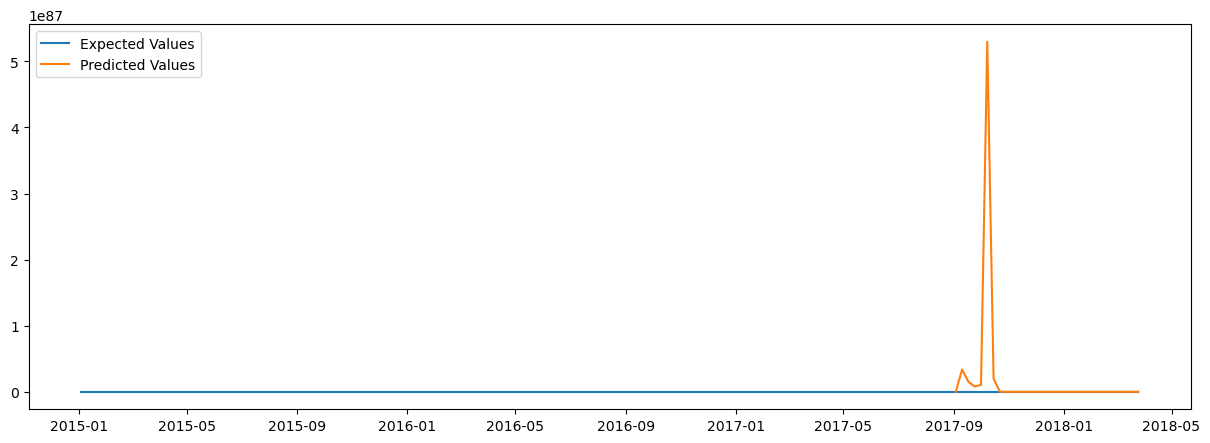

In [40]:
predictions_series = pd.Series(predictions, index = test.index)
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))

plt.subplot(1,1,1)
plt.plot(timed['AveragePrice'],label = 'Expected Values')
plt.plot(np.exp(predictions_series),label = 'Predicted Values');
plt.legend(loc="upper left")
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
error = np.sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.4f' % error)


Test RMSE: 7.0721


## Out - Sample Forecasting

In [43]:
from pandas.tseries.offsets import DateOffset
future_dates = [timed.index[-1] + DateOffset(weeks = x) for x in range(0,52)]

# New dataframe for storing the future values
timed_future = pd.DataFrame(index = future_dates[1:],columns = timed.columns)

forecast = pd.concat([timed,timed_future])
forecast['ARIMA_Forecast_Function'] = np.NaN
forecast['ARIMA_Predict_Function'] = np.NaN
forecast.head()

,AveragePrice,LogAveragePrice,ARIMA_Forecast_Function,ARIMA_Predict_Function
2015-01-04,140.54,4.945492,NaN,NaN
2015-01-11,148.03,4.997415,NaN,NaN
2015-01-18,150.24,5.012234,NaN,NaN
2015-01-25,150.89,5.016551,NaN,NaN
2015-02-01,134.68,4.902902,NaN,NaN


In [44]:
ARIMA_history_f = [x for x in train]
f1 = []
for t in range(len(timed)):
    
    model = ARIMA(ARIMA_history_f, order = (1,1,2))
    model_fit = model.fit()
    
    output = model_fit.forecast(steps=51)[0]
    
    ARIMA_history_f.append(output)
    f1.append(output)

    
for i in range(forecast.shape[0]-(len(f1))):
    forecast.iloc[169 + i,2] = f1[i]
forecast.tail()

,AveragePrice,LogAveragePrice,ARIMA_Forecast_Function,ARIMA_Predict_Function
2019-02-17,NaN,NaN,192.74989,NaN
2019-02-24,NaN,NaN,192.74989,NaN
2019-03-03,NaN,NaN,192.74989,NaN
2019-03-10,NaN,NaN,192.74989,NaN
2019-03-17,NaN,NaN,192.74989,NaN


<AxesSubplot:>

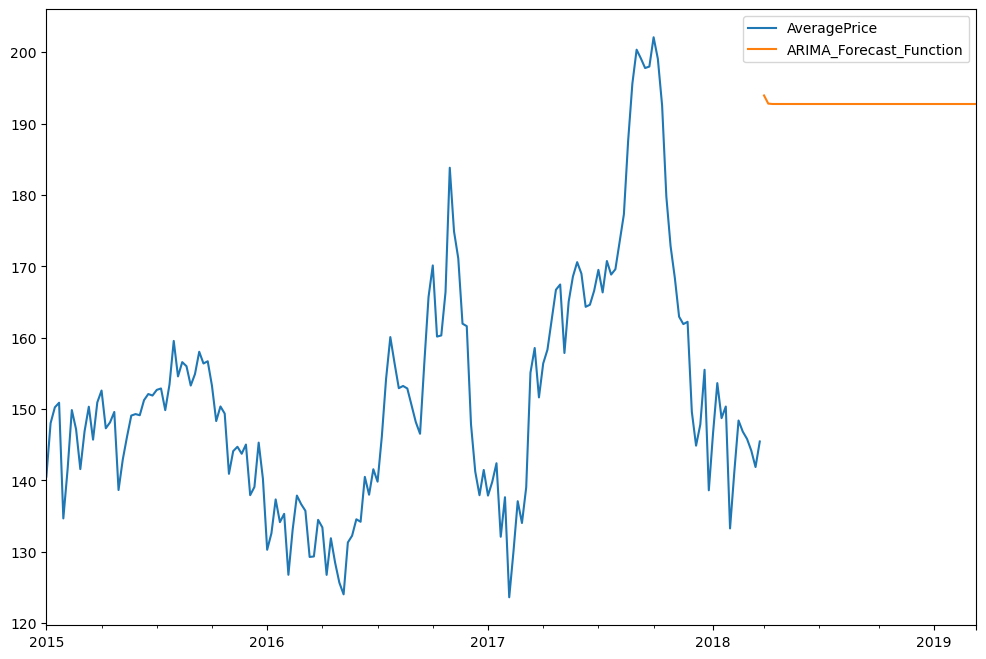

In [45]:
forecast[['AveragePrice','ARIMA_Forecast_Function']].plot(figsize = (12,8))

In [46]:
f2 = model_fit.predict(start = 169,end = 219,typ = 'levels')

for i in range(51):
    forecast.iloc[169 + i,3] = f2[i]
forecast.tail()

,AveragePrice,LogAveragePrice,ARIMA_Forecast_Function,ARIMA_Predict_Function
2019-02-17,NaN,NaN,192.74989,192.74989
2019-02-24,NaN,NaN,192.74989,192.74989
2019-03-03,NaN,NaN,192.74989,192.74989
2019-03-10,NaN,NaN,192.74989,192.74989
2019-03-17,NaN,NaN,192.74989,192.74989


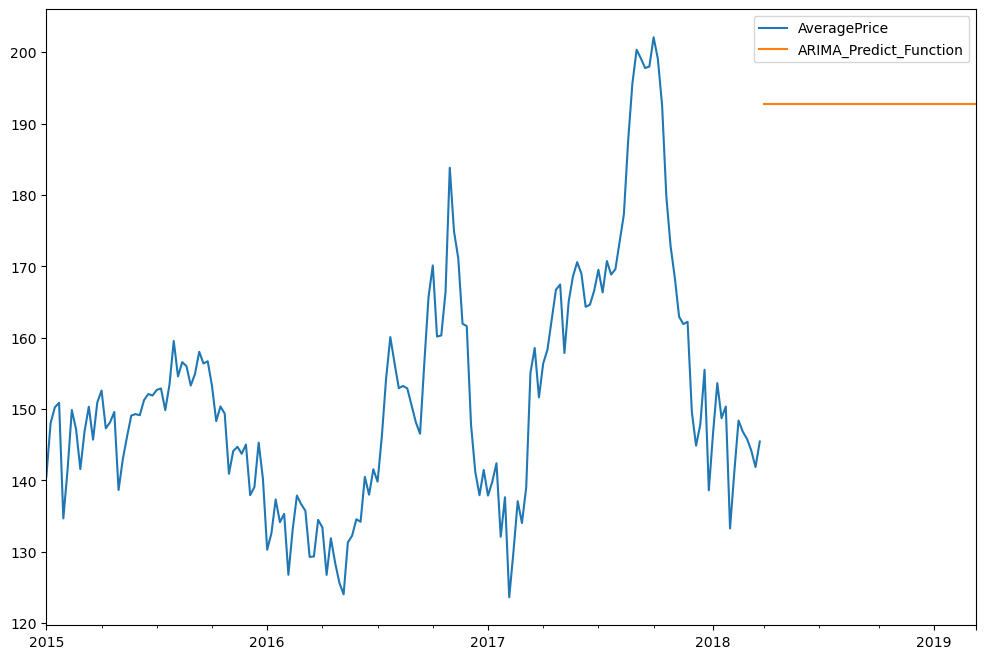

In [47]:
forecast[['AveragePrice','ARIMA_Predict_Function']].plot(figsize = (12,8));

### It looks like that ARIMA is not giving good forecast and predictions. Avoacado price can fluctuate with seasonal trend, let's see if it's giving good results with SARIMA

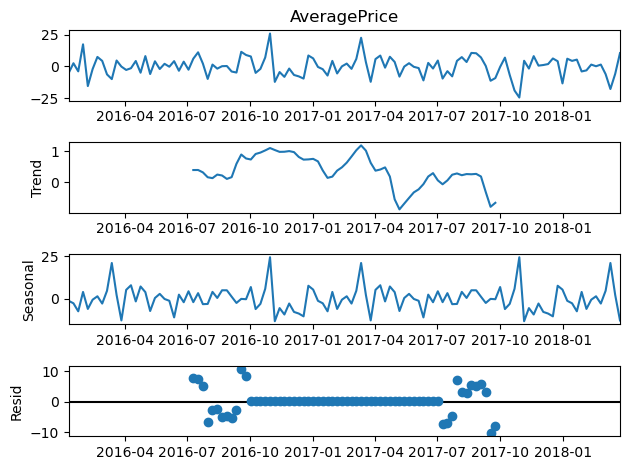

In [48]:
log_diff_seas = log_diff.diff(52)
log_diff_seas = log_diff_seas.dropna()
dec = sm.tsa.seasonal_decompose(log_diff_seas).plot()
plt.show()

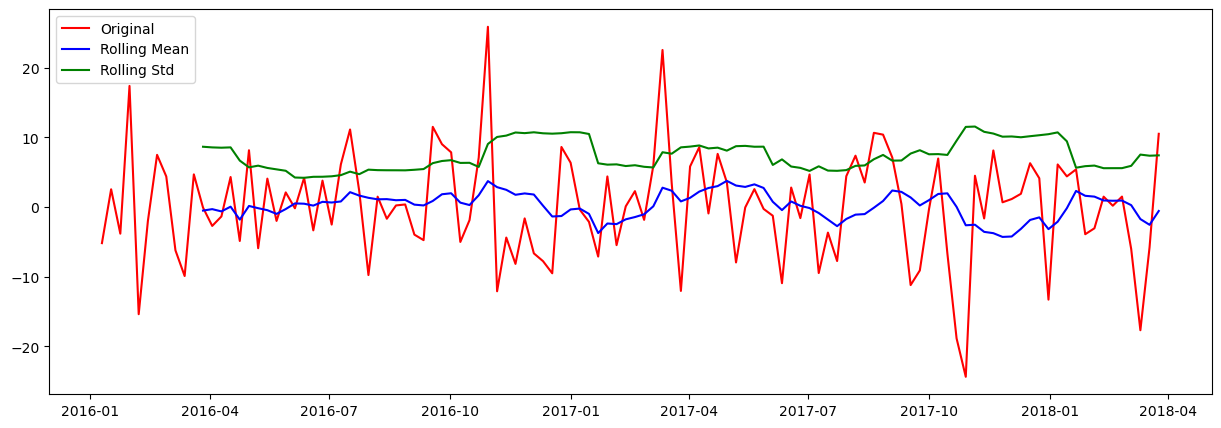

Dicker-Fuller test result : 

Test Statistic           -4.697782
p-value                   0.000085
#Lags Used               11.000000
No. of Observations     104.000000
Critical Value (1%)      -3.494850
Critical Value (5%)      -2.889758
Critical Value (10%)     -2.581822
dtype: float64


In [49]:
stationarity_test(log_diff_seas)

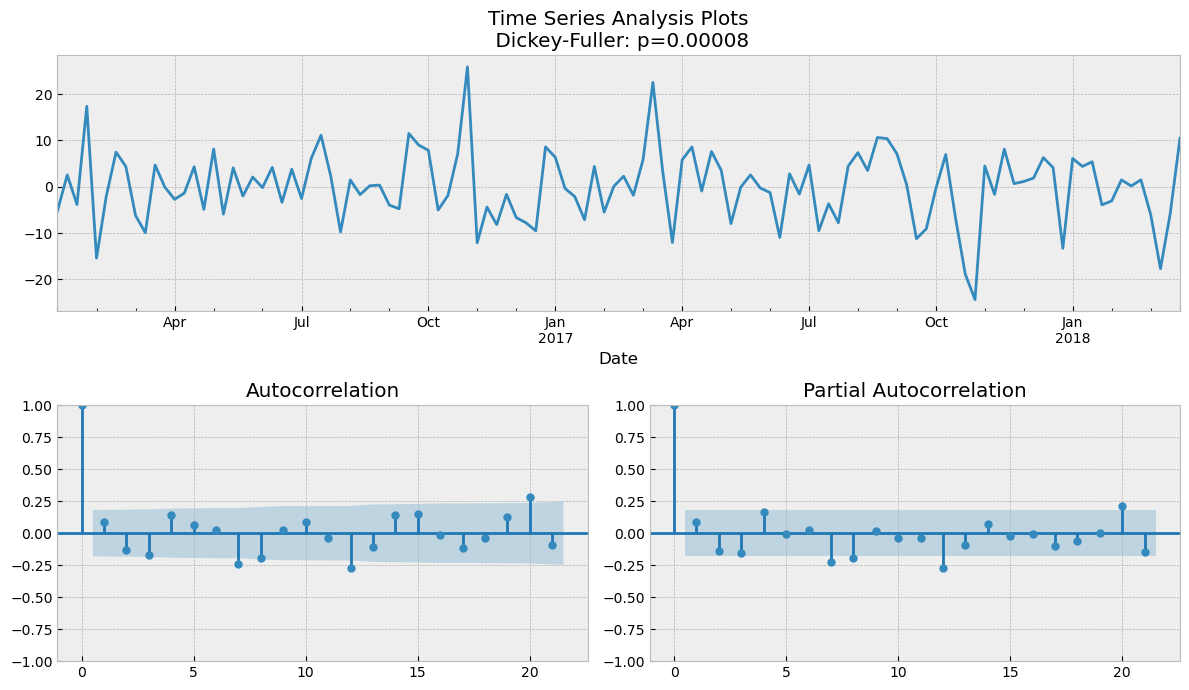

In [50]:
timeSeries_plot(log_diff_seas)

In [51]:
model = sm.tsa.statespace.SARIMAX(timed['AveragePrice'],order = (1,1,2),seasonal_order = (0,1,0,52))
model_fit = model.fit()
print(model_fit.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37478D+00    |proj g|=  9.93653D-02


 This problem is unconstrained.



At iterate    5    f=  2.36643D+00    |proj g|=  2.47113D-02

At iterate   10    f=  2.36234D+00    |proj g|=  1.93550D-02

At iterate   15    f=  2.35611D+00    |proj g|=  1.10992D-03

At iterate   20    f=  2.35610D+00    |proj g|=  3.41702D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     24      1     0     0   3.402D-06   2.356D+00
  F =   2.3560966193393025     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                      SARIMAX Results                                      
Dep. Variable:                        AveragePrice   No. Observations:             

## In - Sample Forecasting


In [52]:
size = int(len(timed) - 30)
train, test = timed['AveragePrice'][0:size], timed['AveragePrice'][size:len(timed)]

print('\t SARIMA MODEL : In - Sample Forecasting \n')

history = [x for x in train]
predictions = []

for t in range(len(test)):
    
    model = sm.tsa.statespace.SARIMAX(history,order = (1,1,2),seasonal_order = (0,1,0,52))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    
    yhat = output[0]
    predictions.append(float(yhat))
    
    obs = test[t]
    history.append(obs)
    
    print('predicted = %f, expected = %f' % (yhat,obs))

	 SARIMA MODEL : In - Sample Forecasting 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.11986D+00    |proj g|=  1.20131D-01


 This problem is unconstrained.



At iterate    5    f=  2.10683D+00    |proj g|=  2.15969D-02

At iterate   10    f=  2.10495D+00    |proj g|=  4.76355D-03

At iterate   15    f=  2.10434D+00    |proj g|=  2.24668D-03

At iterate   20    f=  2.10365D+00    |proj g|=  1.37475D-02

At iterate   25    f=  2.10178D+00    |proj g|=  7.64214D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     35      1     0     0   2.423D-06   2.102D+00
  F =   2.1016123665485953     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 191.539761, expected = 200.360000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.

 This problem is unconstrained.



At iterate    5    f=  2.11728D+00    |proj g|=  1.82841D-02

At iterate   10    f=  2.11580D+00    |proj g|=  6.09673D-03

At iterate   15    f=  2.11527D+00    |proj g|=  1.71202D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     22      1     0     0   1.777D-05   2.115D+00
  F =   2.1152665564606243     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted = 197.175449, expected = 199.140000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  

 This problem is unconstrained.



At iterate    5    f=  2.12294D+00    |proj g|=  1.79129D-02

At iterate   10    f=  2.12154D+00    |proj g|=  8.53510D-03

At iterate   15    f=  2.12107D+00    |proj g|=  3.06855D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     21      1     0     0   6.715D-06   2.121D+00
  F =   2.1210733610326442     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 207.843709, expected = 197.790000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  

 This problem is unconstrained.



At iterate    5    f=  2.13569D+00    |proj g|=  2.20395D-02

At iterate   10    f=  2.13372D+00    |proj g|=  5.96276D-03

At iterate   15    f=  2.13070D+00    |proj g|=  1.41663D-02

At iterate   20    f=  2.12893D+00    |proj g|=  1.98229D-03

At iterate   25    f=  2.12892D+00    |proj g|=  3.57097D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     31      1     0     0   3.571D-06   2.129D+00
  F =   2.1289162852463326     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 204.797906, expected = 198.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.

 This problem is unconstrained.



At iterate    5    f=  2.14674D+00    |proj g|=  2.05110D-02

At iterate   10    f=  2.14333D+00    |proj g|=  1.42636D-02

At iterate   15    f=  2.13754D+00    |proj g|=  5.99830D-03

At iterate   20    f=  2.13723D+00    |proj g|=  7.62443D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     26      1     0     0   3.681D-06   2.137D+00
  F =   2.1372264663981708     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 201.411377, expected = 202.100000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         

 This problem is unconstrained.



At iterate    5    f=  2.15245D+00    |proj g|=  1.86604D-02

At iterate   10    f=  2.14907D+00    |proj g|=  1.42370D-02

At iterate   15    f=  2.14293D+00    |proj g|=  7.04821D-03

At iterate   20    f=  2.14250D+00    |proj g|=  9.35483D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     25      1     0     0   9.355D-06   2.142D+00
  F =   2.1424986890348574     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 192.153935, expected = 199.080000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         

 This problem is unconstrained.



At iterate    5    f=  2.15927D+00    |proj g|=  2.47282D-02

At iterate   10    f=  2.15578D+00    |proj g|=  1.05987D-02

At iterate   15    f=  2.15083D+00    |proj g|=  1.11032D-03

At iterate   20    f=  2.15082D+00    |proj g|=  1.52216D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     26      1     0     0   3.746D-06   2.151D+00
  F =   2.1508233443342744     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 199.222377, expected = 192.550000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         

 This problem is unconstrained.



At iterate    5    f=  2.16801D+00    |proj g|=  2.26426D-02

At iterate   10    f=  2.16489D+00    |proj g|=  1.12774D-02

At iterate   15    f=  2.15945D+00    |proj g|=  9.04696D-03

At iterate   20    f=  2.15879D+00    |proj g|=  2.03315D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     27      1     0     0   1.456D-06   2.159D+00
  F =   2.1587932098195322     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 197.804702, expected = 179.770000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         

 This problem is unconstrained.



At iterate    5    f=  2.19268D+00    |proj g|=  2.47527D-02

At iterate   10    f=  2.19071D+00    |proj g|=  3.55893D-03

At iterate   15    f=  2.18502D+00    |proj g|=  9.44298D-03

At iterate   20    f=  2.18443D+00    |proj g|=  2.56320D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     30      1     0     0   7.074D-06   2.184D+00
  F =   2.1844163925230933     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 197.010906, expected = 172.820000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         

 This problem is unconstrained.



At iterate    5    f=  2.23043D+00    |proj g|=  1.85104D-02

At iterate   10    f=  2.22886D+00    |proj g|=  1.26417D-02

At iterate   15    f=  2.22350D+00    |proj g|=  7.99107D-03

At iterate   20    f=  2.22210D+00    |proj g|=  4.09599D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     26      1     0     0   3.315D-06   2.222D+00
  F =   2.2220982705939307     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 163.668626, expected = 168.380000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         

 This problem is unconstrained.



At iterate    5    f=  2.23695D+00    |proj g|=  1.48605D-02

At iterate   10    f=  2.23298D+00    |proj g|=  3.42821D-02

At iterate   15    f=  2.22842D+00    |proj g|=  4.64212D-03

At iterate   20    f=  2.22811D+00    |proj g|=  2.27627D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     26      1     0     0   2.276D-06   2.228D+00
  F =   2.2281119898753126     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 169.538904, expected = 162.950000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         

 This problem is unconstrained.



At iterate    5    f=  2.24304D+00    |proj g|=  1.38674D-02

At iterate   10    f=  2.24136D+00    |proj g|=  8.11187D-03

At iterate   15    f=  2.23799D+00    |proj g|=  1.14672D-02

At iterate   20    f=  2.23509D+00    |proj g|=  1.16226D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     29      1     0     0   3.247D-06   2.235D+00
  F =   2.2350891493448808     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 156.054562, expected = 161.910000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         

 This problem is unconstrained.



At iterate    5    f=  2.25202D+00    |proj g|=  1.62309D-02

At iterate   10    f=  2.24726D+00    |proj g|=  4.31043D-02

At iterate   15    f=  2.24268D+00    |proj g|=  8.55546D-03

At iterate   20    f=  2.24166D+00    |proj g|=  1.41239D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     28      1     0     0   1.887D-06   2.242D+00
  F =   2.2416561488042395     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 165.068527, expected = 162.230000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         

 This problem is unconstrained.



At iterate    5    f=  2.25692D+00    |proj g|=  1.25238D-02

At iterate   10    f=  2.25429D+00    |proj g|=  1.41999D-02

At iterate   15    f=  2.24856D+00    |proj g|=  9.86720D-03

At iterate   20    f=  2.24676D+00    |proj g|=  6.48174D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     27      1     0     0   1.949D-05   2.247D+00
  F =   2.2467487163936588     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted = 150.212373, expected = 149.620000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         

 This problem is unconstrained.



At iterate    5    f=  2.26187D+00    |proj g|=  1.16075D-02

At iterate   10    f=  2.25904D+00    |proj g|=  1.50069D-02

At iterate   15    f=  2.25334D+00    |proj g|=  1.03484D-02

At iterate   20    f=  2.25134D+00    |proj g|=  4.63899D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     27      1     0     0   8.216D-06   2.251D+00
  F =   2.2513350338936444     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 144.813843, expected = 144.880000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         

 This problem is unconstrained.



At iterate    5    f=  2.26655D+00    |proj g|=  1.16117D-02

At iterate   10    f=  2.26375D+00    |proj g|=  1.47139D-02

At iterate   15    f=  2.25767D+00    |proj g|=  1.00837D-02

At iterate   20    f=  2.25581D+00    |proj g|=  2.11462D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     27      1     0     0   1.534D-06   2.256D+00
  F =   2.2558102827927780     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 143.183713, expected = 147.850000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         

 This problem is unconstrained.



At iterate    5    f=  2.27329D+00    |proj g|=  1.06884D-02

At iterate   10    f=  2.27044D+00    |proj g|=  1.54883D-02

At iterate   15    f=  2.26366D+00    |proj g|=  1.22051D-02

At iterate   20    f=  2.26143D+00    |proj g|=  7.79456D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     28      1     0     0   4.201D-07   2.261D+00
  F =   2.2614300997706973     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 153.023457, expected = 155.510000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         

 This problem is unconstrained.



At iterate    5    f=  2.27831D+00    |proj g|=  1.07992D-02

At iterate   10    f=  2.27536D+00    |proj g|=  1.43289D-02

At iterate   15    f=  2.26879D+00    |proj g|=  1.38296D-02

At iterate   20    f=  2.26609D+00    |proj g|=  4.38623D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     28      1     0     0   1.465D-06   2.266D+00
  F =   2.2660833695265672     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 152.660813, expected = 138.620000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         

 This problem is unconstrained.



At iterate    5    f=  2.29186D+00    |proj g|=  1.52351D-02

At iterate   10    f=  2.28647D+00    |proj g|=  2.85283D-02

At iterate   15    f=  2.28157D+00    |proj g|=  7.27171D-03

At iterate   20    f=  2.28144D+00    |proj g|=  5.16032D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     23      1     0     0   5.160D-07   2.281D+00
  F =   2.2814364051439977     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 139.959273, expected = 146.640000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         

 This problem is unconstrained.



At iterate    5    f=  2.29879D+00    |proj g|=  1.39340D-02

At iterate   10    f=  2.29378D+00    |proj g|=  3.48375D-02

At iterate   15    f=  2.28935D+00    |proj g|=  7.70815D-03

At iterate   20    f=  2.28801D+00    |proj g|=  2.03544D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     28      1     0     0   4.194D-05   2.288D+00
  F =   2.2880069079321239     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted = 151.299215, expected = 153.640000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         

 This problem is unconstrained.



At iterate    5    f=  2.30341D+00    |proj g|=  1.63000D-02

At iterate   10    f=  2.29766D+00    |proj g|=  4.46970D-02

At iterate   15    f=  2.29308D+00    |proj g|=  6.90888D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     25      1     0     0   6.692D-06   2.292D+00
  F =   2.2923987316300454     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 144.165096, expected = 148.730000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  

 This problem is unconstrained.



At iterate    5    f=  2.30902D+00    |proj g|=  1.68384D-02

At iterate   10    f=  2.30319D+00    |proj g|=  3.97467D-02

At iterate   15    f=  2.29848D+00    |proj g|=  8.03743D-03

At iterate   20    f=  2.29757D+00    |proj g|=  3.37088D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     27      1     0     0   8.446D-06   2.298D+00
  F =   2.2975696144292046     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 154.800569, expected = 150.360000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         

 This problem is unconstrained.



At iterate    5    f=  2.31414D+00    |proj g|=  1.70346D-02

At iterate   10    f=  2.30816D+00    |proj g|=  4.51147D-02

At iterate   15    f=  2.30353D+00    |proj g|=  8.22419D-03

At iterate   20    f=  2.30260D+00    |proj g|=  2.64437D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     26      1     0     0   2.644D-06   2.303D+00
  F =   2.3026001838440027     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 135.886182, expected = 133.280000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         

 This problem is unconstrained.



At iterate    5    f=  2.31813D+00    |proj g|=  1.93755D-02

At iterate   10    f=  2.31126D+00    |proj g|=  4.02759D-02

At iterate   15    f=  2.30737D+00    |proj g|=  5.71720D-03

At iterate   20    f=  2.30684D+00    |proj g|=  1.62463D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     27      1     0     0   2.490D-06   2.307D+00
  F =   2.3068409001600108     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 139.868958, expected = 141.160000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         

 This problem is unconstrained.



At iterate    5    f=  2.32205D+00    |proj g|=  1.99905D-02

At iterate   10    f=  2.31949D+00    |proj g|=  1.17547D-02

At iterate   15    f=  2.31229D+00    |proj g|=  9.48605D-03

At iterate   20    f=  2.31072D+00    |proj g|=  4.85503D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     28      1     0     0   5.819D-06   2.311D+00
  F =   2.3107245119294224     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 148.830986, expected = 148.400000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         

 This problem is unconstrained.



At iterate    5    f=  2.32582D+00    |proj g|=  1.99685D-02

At iterate   10    f=  2.32323D+00    |proj g|=  1.21272D-02

At iterate   15    f=  2.31567D+00    |proj g|=  8.64851D-03

At iterate   20    f=  2.31445D+00    |proj g|=  2.57691D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     26      1     0     0   2.018D-06   2.314D+00
  F =   2.3144520880038240     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 145.632624, expected = 146.840000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         

 This problem is unconstrained.



At iterate    5    f=  2.32958D+00    |proj g|=  2.04094D-02

At iterate   10    f=  2.32709D+00    |proj g|=  1.17031D-02

At iterate   15    f=  2.31975D+00    |proj g|=  9.29170D-03

At iterate   20    f=  2.31818D+00    |proj g|=  9.24565D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     29      1     0     0   2.059D-05   2.318D+00
  F =   2.3181784948356241     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted = 152.190008, expected = 145.820000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         

 This problem is unconstrained.



At iterate    5    f=  2.33520D+00    |proj g|=  2.12955D-02

At iterate   10    f=  2.33289D+00    |proj g|=  1.01275D-02

At iterate   15    f=  2.32536D+00    |proj g|=  8.40585D-03

At iterate   20    f=  2.32403D+00    |proj g|=  6.83277D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     29      1     0     0   1.027D-05   2.324D+00
  F =   2.3240222329644515     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted = 161.712692, expected = 144.190000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         

 This problem is unconstrained.



At iterate    5    f=  2.35405D+00    |proj g|=  2.07303D-02

At iterate   10    f=  2.35201D+00    |proj g|=  7.26411D-03

At iterate   15    f=  2.34465D+00    |proj g|=  5.18601D-03

At iterate   20    f=  2.34417D+00    |proj g|=  2.86612D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     30      1     0     0   1.836D-06   2.344D+00
  F =   2.3441656223396170     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 147.468801, expected = 141.880000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         

 This problem is unconstrained.



At iterate    5    f=  2.35884D+00    |proj g|=  1.47855D-02

At iterate   10    f=  2.35361D+00    |proj g|=  4.44232D-02

At iterate   15    f=  2.34933D+00    |proj g|=  2.74663D-03

At iterate   20    f=  2.34925D+00    |proj g|=  2.43529D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     25      1     0     0   2.435D-05   2.349D+00
  F =   2.3492495105986881     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted = 137.284472, expected = 145.460000


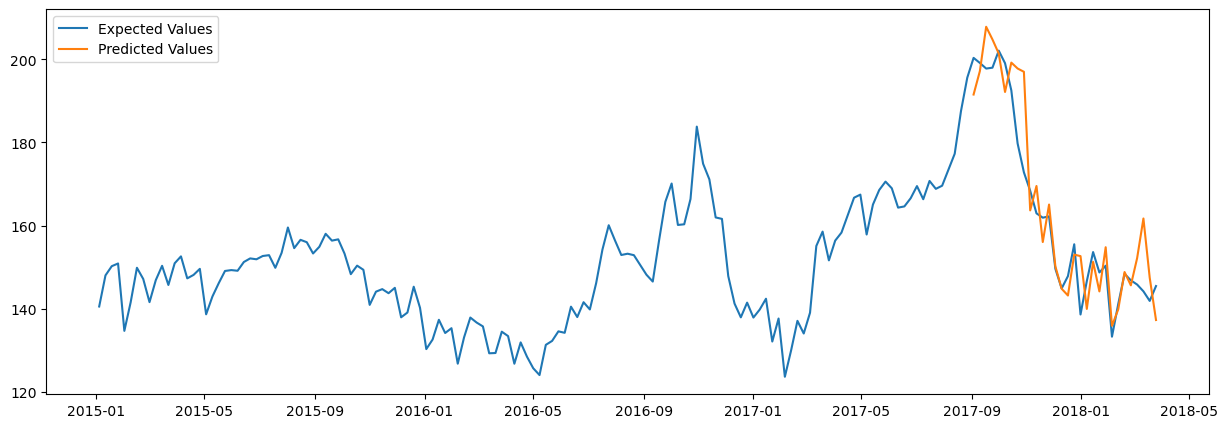

In [53]:
predictions_series = pd.Series(predictions, index = test.index)
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))

plt.subplot(1,1,1)
plt.plot(timed['AveragePrice'],label = 'Expected Values')
plt.plot(predictions_series,label = 'Predicted Values');
plt.legend(loc="upper left")
plt.show()

In [54]:
error = np.sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.4f' % error)
predictions_series = pd.Series(predictions, index = test.index)

Test RMSE: 8.3909


## Out - Sample Forecasting

In [55]:
forecast['SARIMA_Forecast_Function'] = np.NaN
forecast['SARIMA_Predict_Function'] = np.NaN
forecast.head()

,AveragePrice,LogAveragePrice,ARIMA_Forecast_Function,ARIMA_Predict_Function,SARIMA_Forecast_Function,SARIMA_Predict_Function
2015-01-04,140.54,4.945492,NaN,NaN,NaN,NaN
2015-01-11,148.03,4.997415,NaN,NaN,NaN,NaN
2015-01-18,150.24,5.012234,NaN,NaN,NaN,NaN
2015-01-25,150.89,5.016551,NaN,NaN,NaN,NaN
2015-02-01,134.68,4.902902,NaN,NaN,NaN,NaN


In [56]:
f3 = model_fit.forecast(steps=51)

for i in range(len(f3)):
    forecast.iloc[169 + i,4] = f3[i]
forecast.tail()

,AveragePrice,LogAveragePrice,ARIMA_Forecast_Function,ARIMA_Predict_Function,SARIMA_Forecast_Function,SARIMA_Predict_Function
2019-02-17,NaN,NaN,192.74989,192.74989,141.531920,NaN
2019-02-24,NaN,NaN,192.74989,192.74989,148.772080,NaN
2019-03-03,NaN,NaN,192.74989,192.74989,147.212209,NaN
2019-03-10,NaN,NaN,192.74989,192.74989,146.192314,NaN
2019-03-17,NaN,NaN,192.74989,192.74989,144.562398,NaN


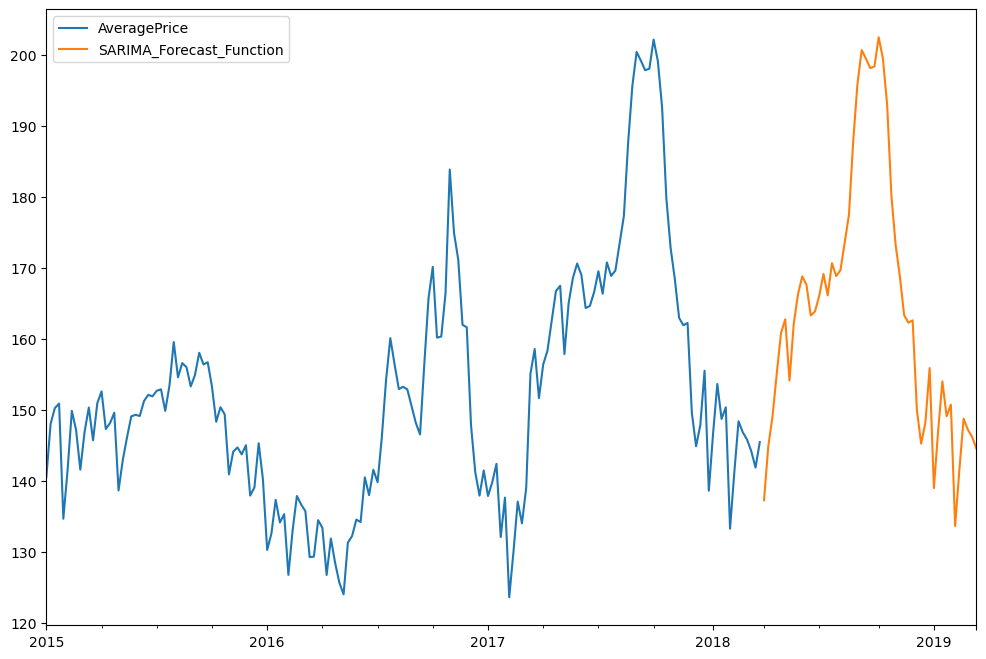

In [57]:
forecast[['AveragePrice','SARIMA_Forecast_Function']].plot(figsize = (12,8));

In [58]:
f4 = model_fit.predict(start = 169,end = 219,typ = 'levels')

for i in range(51):
    forecast.iloc[169 + i,5] = f4[i]
forecast.tail()

,AveragePrice,LogAveragePrice,ARIMA_Forecast_Function,ARIMA_Predict_Function,SARIMA_Forecast_Function,SARIMA_Predict_Function
2019-02-17,NaN,NaN,192.74989,192.74989,141.531920,148.772080
2019-02-24,NaN,NaN,192.74989,192.74989,148.772080,147.212209
2019-03-03,NaN,NaN,192.74989,192.74989,147.212209,146.192314
2019-03-10,NaN,NaN,192.74989,192.74989,146.192314,144.562398
2019-03-17,NaN,NaN,192.74989,192.74989,144.562398,142.252466


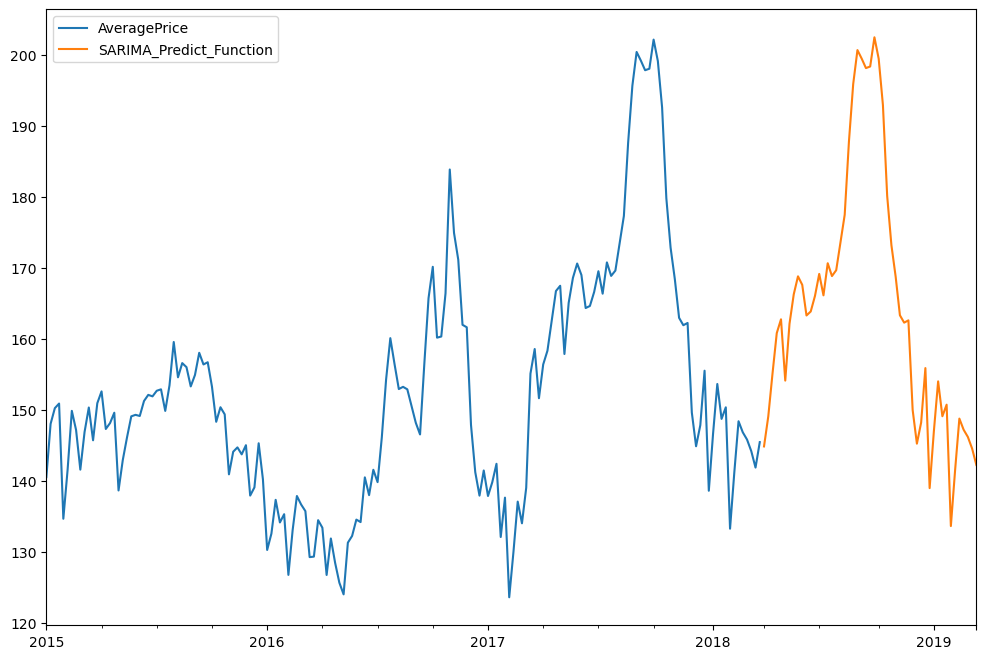

In [59]:
forecast[['AveragePrice','SARIMA_Predict_Function']].plot(figsize = (12,8));

### In conclusion, we can see that seasonality is observed in this dataset, and it is giving good forecasting results and predictions.

##### Reference : [Avocado Price Time Series](https://www.kaggle.com/code/tanmay111999/avocado-price-forecast-arima-sarima-detailed?scriptVersionId=105494138)